In [7]:
%pip install -q rhino3dm shapely trimesh matplotlib pyvista pandas
%pip install PyniteFEA[all]
%pip install Pynite
%pip install trimesh

Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
for nid, node in model.nodes.items():
    print(f"{nid}: DX={node.DX['1.2DL+1.0W']:.6e}, DY={node.DY['1.2DL+1.0W']:.6e}, DZ={node.DZ['1.2DL+1.0W']:.6e}")


N0: DX=0.000000e+00, DY=0.000000e+00, DZ=0.000000e+00
N1: DX=-6.745606e-04, DY=1.812104e-04, DZ=-8.029179e-04
N2: DX=-1.708305e-03, DY=5.749841e-04, DZ=-1.471617e-03
N3: DX=-2.983934e-03, DY=8.860360e-04, DZ=-2.004925e-03
N4: DX=-4.314302e-03, DY=1.160348e-03, DZ=-2.402369e-03
N5: DX=-5.618791e-03, DY=1.279931e-03, DZ=-2.663636e-03
N6: DX=-6.021925e-03, DY=1.556010e-03, DZ=-2.788760e-03
N7: DX=0.000000e+00, DY=0.000000e+00, DZ=0.000000e+00
N8: DX=-2.090416e-04, DY=2.663284e-04, DZ=-8.013674e-04
N9: DX=-4.307256e-04, DY=5.578186e-04, DZ=-1.468182e-03
N10: DX=-7.592778e-04, DY=8.923780e-04, DZ=-1.999856e-03
N11: DX=-1.091959e-03, DY=1.141446e-03, DZ=-2.396298e-03
N12: DX=-1.485607e-03, DY=1.378636e-03, DZ=-2.657512e-03
N13: DX=-1.416594e-03, DY=1.284889e-03, DZ=-2.783431e-03
N14: DX=0.000000e+00, DY=0.000000e+00, DZ=0.000000e+00
N15: DX=-5.581822e-04, DY=1.042371e-04, DZ=-2.138469e-03
N16: DX=-1.706724e-03, DY=8.111172e-04, DZ=-3.912903e-03
N17: DX=-2.980372e-03, DY=1.614101e-03, DZ=-5.3

In [29]:
import json

deformed_nodes = []
SCALE = 50  # same as `rndr.deformed_scale` in Renderer()

for nid, node in model.nodes.items():
    dx = node.DX.get('1.2DL+1.0W', 0.0)
    dy = node.DY.get('1.2DL+1.0W', 0.0)
    dz = node.DZ.get('1.2DL+1.0W', 0.0)

    deformed_nodes.append({
        "id": nid,
        "original": {
            "x": node.X,
            "y": node.Y,
            "z": node.Z
        },
        "deformed": {
            "x": node.X + dx * SCALE,
            "y": node.Y + dy * SCALE,
            "z": node.Z + dz * SCALE
        },
        "dx": dx,
        "dy": dy,
        "dz": dz
    })

with open("deformed_nodes.json", "w") as f:
    json.dump(deformed_nodes, f, indent=2)

# At last, print the JSON structure
print(json.dumps(deformed_nodes, indent=2))


[
  {
    "id": "N0",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 0.0
    },
    "deformed": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 0.0
    },
    "dx": 0.0,
    "dy": 0.0,
    "dz": 0.0
  },
  {
    "id": "N1",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 118.10999999999999
    },
    "deformed": {
      "x": -282.39745269625735,
      "y": 269.4021665432545,
      "z": 118.06593911411568
    },
    "dx": -0.0017162519251479062,
    "dy": 0.0009911128650903055,
    "dz": -0.0008812177176862619
  },
  {
    "id": "N2",
    "original": {
      "x": -282.3116401,
      "y": 269.3526109,
      "z": 236.21999999999997
    },
    "deformed": {
      "x": -282.5142520344761,
      "y": 269.44652179685477,
      "z": 236.15569745192806
    },
    "dx": -0.004052238689522011,
    "dy": 0.001878217937095186,
    "dz": -0.0012860509614379548
  },
  {
    "id": "N3",
    "original": {
      "x": -282.3116401

In [14]:
print("Beams DataFrame:")
print(df_beams.head())
print("\nColumns DataFrame:")
print(df_columns.head())
print("\nNodes DataFrame:")
print(df_nodes.head())

Beams DataFrame:
   ID i_node j_node  length
0  B0     N1     N4   4.511
1  B1     N2     N5   4.511
2  B2     N7    N10   4.511
3  B3     N8    N11   4.511
4  B4    N13    N16   4.511

Columns DataFrame:
   ID i_node j_node  length
0  C0     N0     N1     3.0
1  C1     N1     N2     3.0
2  C2     N3     N4     3.0
3  C3     N4     N5     3.0
4  C4     N6     N7     3.0

Nodes DataFrame:
   ID        X         Y    Z
0  N0 -7.17073   6.84157  0.0
1  N1 -7.17073   6.84157  3.0
2  N2 -7.17073   6.84157  6.0
3  N3 -7.17073  11.35236  0.0
4  N4 -7.17073  11.35236  3.0


In [3]:
pip install pygltflib

Defaulting to user installation because normal site-packages is not writeable
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached wrapt-1.17.2-cp313-cp313-win_amd64.whl.metadata (6.5 kB)
Using cached Deprecated-1.2.18-py2.py3-none-any.whl (10.0 kB)
Using cached wrapt-1.17.2-cp313-cp313-win_amd64.whl (38 kB)

   ---------------------------------------- 0/7 [wrapt]
   ----------- ---------------------------- 2/7 [marshmallow]
   ----------- ---------------------------- 2/7 [marshmallow]
   ----------------- ---------------------- 3/7 [typing-inspect]
   ---------------------------- ----------- 5/7 [dataclasses-json]
   ---------------------------- ----------- 5/7 [dataclasses-json]
   ---------------------------------- ----- 6/7 [pygltflib]
   ---------------------------------------- 7/7 [pygltflib]

Note: you may need to restart the kernel to use updated packages.


Detected 66 building volumes. Max Z height: 6.00m


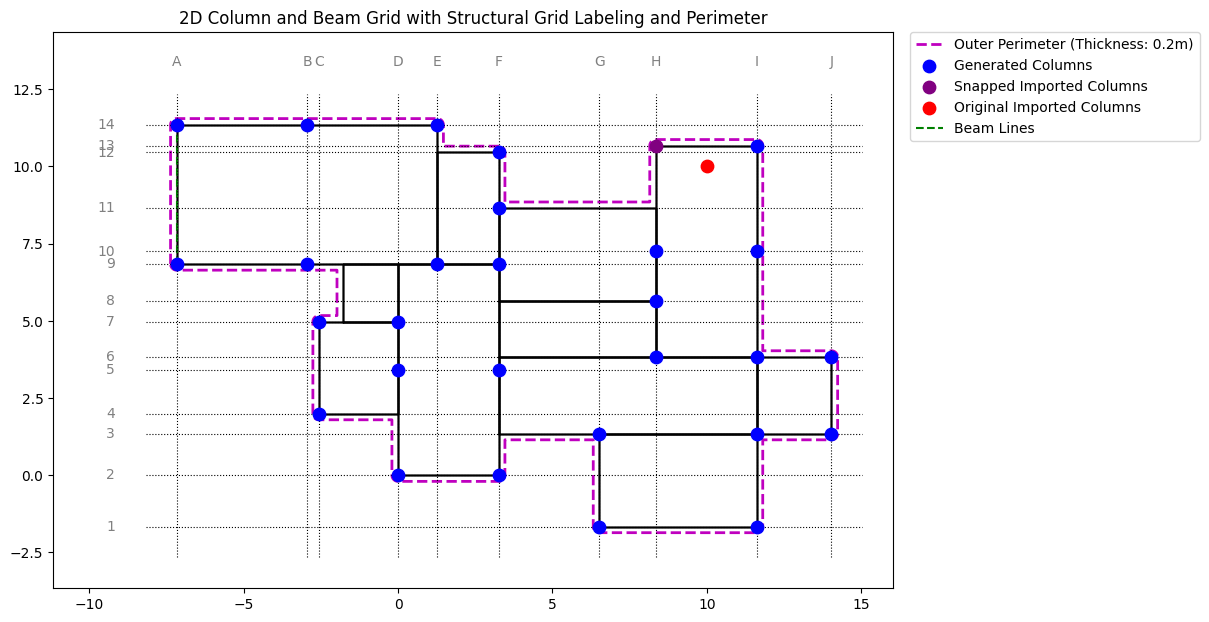

Widget(value='<iframe src="http://localhost:50544/index.html?ui=P_0x1bc989391d0_9&reconnect=auto" class="pyvis…

C:\Users\papad\AppData\Roaming\Python\Python313\site-packages\Pynite\PhysMember.py:55: RuntimeWarning:

invalid value encountered in scalar divide



ZeroDivisionError: float division by zero

In [32]:
#BEST SO FAR

import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import pyvista as pv
import csv # Import the csv module

# File path
rhino_path = r"../Reference Files/coconuts.3dm"
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract building volume & height without relying on layers
building_volumes = []
wall_breps = []
max_z = 0.0

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        base_pts = [
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y]  # Close polygon
        ]
        poly = Polygon(base_pts)
        building_volumes.append(poly)
        wall_breps.append({'polygon': poly, 'bbox': bbox})
        max_z = max(max_z, bbox.Max.Z)

if not building_volumes:
    raise RuntimeError("No Brep geometry found in the model.")

print(f"Detected {len(building_volumes)} building volumes. Max Z height: {max_z:.2f}m")

# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
combined_building_polygon = MultiPolygon(building_volumes)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        # For MultiPolygon, take the exterior of the largest polygon component
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting
detected_rooms = sorted([(poly, poly.area) for poly in building_volumes], key=lambda x: -x[1])

# Structural logic
MaxS = 6.0
MinS = 3.0

columns = []
corrected_columns = []
available_imported = imported_columns.copy()
existing_columns = imported_columns.copy()
beams = []

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    divisions_x = int(np.ceil(width / MaxS))
    divisions_y = int(np.ceil(height / MaxS))
    x_points = np.linspace(minx, maxx, divisions_x + 1)
    y_points = np.linspace(miny, maxy, divisions_y + 1)
    room_candidates = [(x, y) for x in x_points for y in y_points]

    for col in room_candidates:
        snap = False
        for imp_col in available_imported:
            if np.linalg.norm(np.array(col) - np.array(imp_col)) < MinS:
                corrected_columns.append(col)
                existing_columns.append(col)
                available_imported.remove(imp_col)
                snap = True
                break
        if not snap and all(np.linalg.norm(np.array(col) - np.array(exist_col)) >= MinS for exist_col in existing_columns):
            columns.append(col)
            existing_columns.append(col)

    for x in x_points:
        beams.append(((x, miny), (x, maxy)))
    for y in y_points:
        beams.append(((minx, y), (maxx, y)))

    for corner in list(room_poly.exterior.coords):
        if all(np.linalg.norm(np.array(corner) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
            columns.append(corner)
            existing_columns.append(corner)

# Combine all base columns
all_base_columns = columns + corrected_columns

# --- COLUMN GRID NUMBERING LOGIC ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
# Adjusted limits to provide more space for labels without cutting off the perimeter
# Increased padding for labels
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Snapped imported columns
if corrected_columns:
    cx, cy = zip(*corrected_columns)
    ax.scatter(cx, cy, c='purple', s=80, label='Snapped Imported Columns', zorder=7)

# Original imported columns
if imported_columns:
    ix, iy = zip(*imported_columns)
    ax.scatter(ix, iy, c='red', s=80, label='Original Imported Columns', zorder=10)

# Only draw one label for beam lines in 2D
if beams:
    x1, y1 = beams[0][0]
    x2, y2 = beams[0][1]
    ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')

# Draw and label grid lines
# Increased offset for labels for better clarity
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

# Using subplots_adjust for explicit margin control instead of tight_layout
# This gives more precise control over the margins for labels
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1) # Adjusted values for left and top margin


ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()

# PyVista 3D visualization
plotter = pv.Plotter(title="3D Structural System")

# Define sizes for structural elements (now dimensions for rectangular prisms)
column_width = 0.3
column_depth = 0.3

beam_width = 0.25
beam_depth = 0.35

slab_thickness = 0.20

slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05

# Calculate story heights per room, since rooms might have different max Z
room_story_heights = {}
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z
    
    num_vertical_sections = num_floors 

    if num_vertical_sections > 0:
        story_height = room_specific_max_z / num_vertical_sections
    else:
        story_height = room_specific_max_z
    
    room_story_heights[room_poly.wkt] = story_height


# --- Define Z-levels for each floor in a more structured way ---
floor_z_levels = {} 
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z

    current_room_floor_z = []
    
    # Slab 0: Ground Slab
    current_room_floor_z.append((0.0, slab_thickness))

    if num_floors > 0: # Only generate intermediate and roof slabs if there's at least 1 floor
        story_height = room_story_heights.get(room_poly.wkt, max_z)
        
        # Intermediate Slabs (from 1 to num_floors-1)
        for i in range(1, num_floors): 
            slab_base_z = i * story_height
            slab_top_z = slab_base_z + slab_thickness

            if slab_top_z > room_specific_max_z + 1e-6:
                slab_top_z = room_specific_max_z
                slab_base_z = max(slab_base_z, slab_top_z - slab_thickness)

            if slab_top_z - slab_base_z < 1e-6:
                continue
                
            current_room_floor_z.append((slab_base_z, slab_top_z))
        
        # Last Slab: Roof Slab
        roof_slab_top_z = room_specific_max_z 
        roof_slab_base_z = roof_slab_top_z - slab_thickness
        
        if current_room_floor_z:
            last_slab_top = current_room_floor_z[-1][1]
            if roof_slab_base_z < last_slab_top + 1e-6:
                roof_slab_base_z = last_slab_top
                roof_slab_top_z = roof_slab_base_z + slab_thickness
                if roof_slab_top_z > room_specific_max_z + 1e-6:
                    roof_slab_top_z = room_specific_max_z
                    roof_slab_base_z = max(roof_slab_top_z - slab_thickness, last_slab_top)
        
        if roof_slab_top_z - roof_slab_base_z < 1e-6:
            pass
        else:
            current_room_floor_z.append((roof_slab_base_z, roof_slab_top_z))

    floor_z_levels[room_poly.wkt] = current_room_floor_z

# --- Add Slabs ---
for room_poly, _ in detected_rooms:
    room_floor_data = floor_z_levels.get(room_poly.wkt, [])
    if not room_floor_data:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer)
    
    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness = slab_top_z - slab_base_z
        if current_slab_thickness < 1e-6:
            continue

        points_3d_for_slab_base = []
        poly_coords = list(extended_room_poly.exterior.coords)
        if poly_coords[0] != poly_coords[-1]:
            poly_coords.append(poly_coords[0])
            
        for x, y in poly_coords:
            points_3d_for_slab_base.append([x, y, 0.0])
        
        points_3d_for_slab_base = np.array(points_3d_for_slab_base)

        if len(points_3d_for_slab_base) < 3:
            continue

        slab_base_mesh = pv.PolyData(points_3d_for_slab_base)
        
        try:
            triangulated_faces = slab_base_mesh.delaunay_2d().faces
            if triangulated_faces is None or len(triangulated_faces) == 0:
                continue
            slab_base_mesh = pv.PolyData(points_3d_for_slab_base, faces=triangulated_faces)
        except Exception as e:
            print(f"Delaunay triangulation failed for a slab base ({room_poly.bounds}): {e}. Skipping slab.")
            continue

        slab_mesh = slab_base_mesh.extrude(vector=(0, 0, current_slab_thickness), capping=True)
        slab_mesh = slab_mesh.translate((0, 0, slab_base_z))
        
        plotter.add_mesh(slab_mesh, color='sienna', opacity=0.8, smooth_shading=True)


# # --- Data Structures for Export ---
all_nodes_data = {} # (x, y, z) -> "N_ID"
export_columns = [] # List of {"ID": "C0", "i_node": "N0", "j_node": "N1"}
export_beams = []   # List of {"ID": "B0", "i_node": "N0", "j_node": "N1"}
node_id_counter = 0

def get_node_id(x, y, z):
    global node_id_counter
    # Use a tuple (x, y, z) as key, rounded to avoid floating point issues
    # Adjust rounding precision as needed
    rounded_coords = (round(x, 6), round(y, 6), round(z, 6))
    if rounded_coords not in all_nodes_data:
        node_id = f"N{node_id_counter}"
        all_nodes_data[rounded_coords] = node_id
        node_id_counter += 1
    return all_nodes_data[rounded_coords]

# --- Add Columns (and populate export_columns, all_nodes_data) ---
column_id_counter = 0
for x, y in all_base_columns:
    column_room_wkt = None
    for room_poly, _ in detected_rooms:
        if Point(x, y).within(room_poly):
            column_room_wkt = room_poly.wkt
            break
    if column_room_wkt is None:
        min_dist = float('inf')
        for room_poly, _ in detected_rooms:
            dist = Point(x,y).distance(room_poly)
            if dist < min_dist:
                min_dist = dist
                column_room_wkt = room_poly.wkt
        if column_room_wkt is None:
             continue

    room_floor_data = floor_z_levels.get(column_room_wkt, [])
    if not room_floor_data or len(room_floor_data) <= 1:
        continue
    
    num_slabs_in_room = len(room_floor_data)
    
    for i in range(num_slabs_in_room - 1):
        col_base_z = room_floor_data[i][1] 
        col_top_z = room_floor_data[i+1][0] 

        if col_top_z <= col_base_z + 1e-6:
            continue

        col_min_x = x - column_width / 2
        col_max_x = x + column_width / 2
        col_min_y = y - column_depth / 2
        col_max_y = y + column_depth / 2
        
        column_box = pv.Box([col_min_x, col_max_x, col_min_y, col_max_y, col_base_z, col_top_z])
        plotter.add_mesh(column_box, color='blue', smooth_shading=True)

        # Collect data for export_columns
        i_node_id = get_node_id(x, y, col_base_z)
        j_node_id = get_node_id(x, y, col_top_z)
        export_columns.append({"ID": f"C{column_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
        column_id_counter += 1


# --- Add Beams (and populate export_beams, all_nodes_data) ---
beam_id_counter = 0
for (x1, y1), (x2, y2) in beams:
    full_beam_line = LineString([(x1, y1), (x2, y2)])

    for i in range(len(room_floor_data)): # Iterate through floor levels (slabs)
        relevant_rooms_for_this_floor = []
        for room_poly, _ in detected_rooms:
            if room_poly.intersects(full_beam_line.buffer(1e-3)):
                room_floor_data_current_room = floor_z_levels.get(room_poly.wkt, [])
                if len(room_floor_data_current_room) > i:
                    slab_base_z_for_this_room_floor = room_floor_data_current_room[i][0]
                    # slab_top_z_for_this_room_floor = room_floor_data_current_room[i][1] # Not directly used for beam z here

                    room_specific_max_z = 0.0
                    for wall_data in wall_breps:
                        if wall_data['polygon'].equals(room_poly):
                            room_specific_max_z = wall_data['bbox'].Max.Z
                            break
                    if room_specific_max_z == 0.0: room_specific_max_z = max_z

                    if slab_base_z_for_this_room_floor >= room_specific_max_z - 1e-6 and i < len(room_floor_data_current_room) -1:
                        continue 
                    
                    relevant_rooms_for_this_floor.append((room_poly, slab_base_z_for_this_room_floor))

        if not relevant_rooms_for_this_floor:
            continue

        for room_poly, slab_base_z_for_current_room in relevant_rooms_for_this_floor:
            intersection = full_beam_line.intersection(room_poly)

            if intersection.geom_type == 'LineString':
                segments_to_draw = [intersection]
            elif intersection.geom_type == 'MultiLineString':
                segments_to_draw = list(intersection.geoms)
            else: 
                continue

            for segment in segments_to_draw:
                if not segment.is_empty and segment.length > 1e-6:
                    seg_x1, seg_y1 = segment.coords[0]
                    seg_x2, seg_y2 = segment.coords[-1]

                    beam_top_z = slab_base_z_for_current_room
                    beam_base_z = beam_top_z - beam_depth

                    if beam_base_z < 0:
                        beam_base_z = 0
                        if beam_top_z <= 0:
                            continue
                    
                    if beam_top_z <= beam_base_z + 1e-6:
                        continue

                    if abs(seg_x1 - seg_x2) > abs(seg_y1 - seg_y2):
                        beam_min_x = min(seg_x1, seg_x2)
                        beam_max_x = max(seg_x1, seg_x2)
                        beam_center_y = (seg_y1 + seg_y2) / 2
                        beam_min_y = beam_center_y - beam_width / 2
                        beam_max_y = beam_center_y + beam_width / 2
                    else:
                        beam_min_y = min(seg_y1, seg_y2)
                        beam_max_y = max(seg_y1, seg_y2)
                        beam_center_x = (seg_x1 + seg_x2) / 2
                        beam_min_x = beam_center_x - beam_width / 2
                        beam_max_x = beam_center_x + beam_width / 2

                    beam_box = pv.Box([beam_min_x, beam_max_x, beam_min_y, beam_max_y, beam_base_z, beam_top_z])

                    is_roof_slab = (i == len(room_floor_data_current_room) - 1)
                    color = 'green' if is_roof_slab else 'orange' 
                    plotter.add_mesh(beam_box, color=color, smooth_shading=True)

                    # Collect data for export_beams
                    # Beams' nodes are at their centerlines (seg_x1, seg_y1, beam_top_z) and (seg_x2, seg_y2, beam_top_z)
                    i_node_id = get_node_id(seg_x1, seg_y1, beam_top_z)
                    j_node_id = get_node_id(seg_x2, seg_y2, beam_top_z)
                    export_beams.append({"ID": f"B{beam_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
                    beam_id_counter += 1

# Convert all_nodes_data dictionary to a list of dictionaries for CSV export
final_nodes_data = []
for coords, node_id in all_nodes_data.items():
    final_nodes_data.append({"ID": node_id, "X": coords[0], "Y": coords[1], "Z": coords[2]})

# Actual Brep-based walls visualization (semi-transparent)
def mesh_brep(brep, mesh_type=rhino3dm.MeshType.Any):
    meshes = []
    for face in brep.Faces:
        try:
            m = face.GetMesh(mesh_type)
            if m: meshes.append(m)
        except:
            continue
    return meshes

for obj in model.Objects:
    geom = obj.Geometry
    # layer_idx = obj.Attributes.LayerIndex # No longer needed if not filtering by layer
    if isinstance(geom, rhino3dm.Brep): # Removed layer filtering
        meshes = mesh_brep(geom)
        for mesh in meshes:
            pts = [(v.X, v.Y, v.Z) for v in mesh.Vertices]
            faces = []
            for f in mesh.Faces:
                if len(f) == 4:
                    idxs = (f[0], f[1], f[2], f[3])
                else:
                    idxs = (f[0], f[1], f[2])
                faces.append((len(idxs),) + idxs)
            faces_flat = [i for face in faces for i in face]
            pv_mesh = pv.PolyData(pts, faces_flat)
            plotter.add_mesh(pv_mesh, color='lightgray', opacity=0.3)

plotter.show_grid()
plotter.show()
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from collections import OrderedDict
import os # Import the os module for path operations

# --- Define the relative path for saving CSVs ---
# CSV_SAVE_PATH = r"../eleftheriaexperiment/structural_data" # Use a raw string for backslashes

# --- ASSUMPTION: Your rhino3dm processing code (from the previous turn) ---
# --- has already run and populated these variables: ---
# max_z
# num_floors
# all_base_columns (list of (x,y) tuples for column base points)
# beams (list of ((x1,y1), (x2,y2)) tuples for beam definitions)
# wall_breps (list of {'polygon': shapely_poly, 'bbox': rhino3dm_bbox} for wall height lookup)
# detected_rooms (list of (shapely_poly, area) for room polygons)
# perimeter_line_coords (list of (x,y) tuples for the base perimeter)

# For this code to run, you MUST execute your previous cell that uses rhino3dm
# to generate the above variables. If you run ONLY this cell, these variables will be undefined.

# --- Utility function for wall height (re-used from your code) ---
from shapely.geometry import Point # Ensure Point is imported for get_wall_height
def get_wall_height(x, y, wall_data, global_max_z):
    pt = Point(x, y)
    closest_wall_height = global_max_z # Default to global max_z if no specific wall found
    min_dist_to_wall = float('inf')

    for wall in wall_data:
        if wall['polygon'].contains(pt):
            return wall['bbox'].Max.Z # If the point is inside a wall's base polygon
        
        dist = wall['polygon'].exterior.distance(pt)
        if dist < min_dist_to_wall:
            min_dist_to_wall = dist
            closest_wall_height = wall['bbox'].Max.Z
    
    return closest_wall_height # Return the height of the closest wall or global max_z


# # --- DATA GENERATION AND CSV EXPORT (Ensuring df_nodes, df_columns, df_beams are saved) ---
# print("--- Generating data and CSVs ---")

# # Create the target directory if it doesn't exist
# os.makedirs(CSV_SAVE_PATH, exist_ok=True)
# print(f"Ensuring directory exists: {os.path.abspath(CSV_SAVE_PATH)}")


node_coords = []
node_dict = OrderedDict() # Maps (x,y,z) tuple to node ID

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

# Ensure column_lines and beam_lines are populated based on the processed data
column_lines = []
for x, y in all_base_columns: # Use all_base_columns directly for vertical elements
    current_column_max_z = get_wall_height(x,y, wall_breps, max_z)
    
    # Generate nodes for each floor level for columns
    for i in range(num_floors + 1): # Including ground (0) and roof (num_floors)
        z_level = (i / num_floors) * current_column_max_z
        if i == 0: # Base of the column
            id_btm = add_node((x, y, 0))
            id_top = add_node((x, y, z_level))
            if z_level > 0: # Only add if it forms a segment
                 column_lines.append((id_btm, id_top))
        elif i > 0: # For subsequent segments between floors
            prev_z_level = ((i-1) / num_floors) * current_column_max_z
            id_prev_node = add_node((x, y, prev_z_level))
            id_current_node = add_node((x, y, z_level))
            column_lines.append((id_prev_node, id_current_node))


beam_lines = []
for (x1, y1), (x2, y2) in beams:
    # Beams exist at each floor level (from 1st floor to roof)
    segment_max_z_for_height = min(get_wall_height(x1, y1, wall_breps, max_z), get_wall_height(x2, y2, wall_breps, max_z))
    
    for i in range(1, num_floors + 1):
        z_level = (i / num_floors) * segment_max_z_for_height
        
        # Ensure beams don't extend above the actual wall height (with a tiny tolerance)
        if z_level > (segment_max_z_for_height + 1e-6):
            continue

        id1 = add_node((x1, y1, z_level))
        id2 = add_node((x2, y2, z_level))
        beam_lines.append((id1, id2))


# --- Export nodes.csv ---
# nodes_csv_path = os.path.join(CSV_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
# df_nodes.to_csv(nodes_csv_path, index=False)
# print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

# columns_csv_path = os.path.join(CSV_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
# df_columns.to_csv(columns_csv_path, index=False)
# print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

# beams_csv_path = os.path.join(CSV_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
# df_beams.to_csv(beams_csv_path, index=False)
# print(f"✅ beams.csv written to {beams_csv_path}")


# # --- 3D PLOTLY VISUALIZATION (LOADING FROM SAVED CSVs) ---
# print("\n--- Visualizing data from CSVs ---")

# # 1. Load the generated CSV files into pandas DataFrames
# try:
#     df_nodes_loaded = pd.read_csv(nodes_csv_path)
#     df_columns_loaded = pd.read_csv(columns_csv_path)
#     df_beams_loaded = pd.read_csv(beams_csv_path)
# except FileNotFoundError:
#     print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
#     print(f"Expected paths: {nodes_csv_path}, {columns_csv_path}, {beams_csv_path}")
#     print("Please run the data generation part of the code first if you haven't.")
#     exit() # Exit if files are not found

# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes
# 
# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns.iterrows():
    p1 = node_lookup_loaded.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']]
    column_plotly_lines_x.extend([p1[0], p2[0], None])
    column_plotly_lines_y.extend([p1[1], p2[1], None])
    column_plotly_lines_z.extend([p1[2], p2[2], None])

# Add Beams to line data
for index, row in df_beams.iterrows():
    p1 = node_lookup_loaded.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_plotly_lines_x.extend([p1[0], p2[0], None])
    beam_plotly_lines_y.extend([p1[1], p2[1], None])
    beam_plotly_lines_z.extend([p1[2], p2[2], None])

# Prepare slab data for Plotly (using the `wall_breps`, `detected_rooms`, `num_floors`, `max_z` from prior code)
slab_meshes = []
slab_thickness = 0.15
slab_extension_buffer = max(0.3, 0.3) / 2 + 0.01 + 0.005 # Example buffer

# Use detected_rooms and wall_breps from your previous code execution
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z # Fallback

    if num_floors <= 0:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer, join_style=1)
    if extended_room_poly.geom_type == 'MultiPolygon':
        extended_room_poly = max(extended_room_poly.geoms, key=lambda p: p.area)
    elif extended_room_poly.geom_type != 'Polygon':
        # print(f"Warning: Extended room polygon for {room_poly.bounds} is not a single Polygon. Skipping slab.")
        continue

    story_height = room_specific_max_z / num_floors

    for i in range(1, num_floors + 1):
        intended_slab_top_z = i * story_height
        slab_base_z = intended_slab_top_z - slab_thickness

        if slab_base_z < 0:
            slab_base_z = 0
            current_slab_thickness_for_this_level = intended_slab_top_z
        else:
            current_slab_thickness_for_this_level = slab_thickness
        
        if (slab_base_z + current_slab_thickness_for_this_level) > (room_specific_max_z + 1e-6):
            current_slab_thickness_for_this_level = max(0, room_specific_max_z - slab_base_z)
            if current_slab_thickness_for_this_level < 1e-6:
                continue

        # Convert polygon bounds to a rectangular slab for Plotly for simplicity
        minx_s, miny_s, maxx_s, maxy_s = extended_room_poly.bounds
        
        slab_x_coords = [minx_s, maxx_s, maxx_s, minx_s, minx_s]
        slab_y_coords = [miny_s, miny_s, maxy_s, maxy_s, miny_s]

        # Top surface of slab
        slab_meshes.append(go.Mesh3d(
            x=slab_x_coords,
            y=slab_y_coords,
            z=[slab_base_z + current_slab_thickness_for_this_level] * len(slab_x_coords),
            color='sienna',
            opacity=0.8,
            name=f'Floor {i} Slab Top',
            # Add faces for simple rectangles: two triangles for a quad
            # This makes the mesh solid rather than just a plane
            i=[0, 0], j=[1, 2], k=[2, 3] # Indices for the two triangles forming the quad
        ))


# --- Create Plotly Figure ---
fig = go.Figure()

# Add Nodes as scatter points
fig.add_trace(go.Scatter3d(
    x=df_nodes['X'],
    y=df_nodes['Y'],
    z=df_nodes['Z'],
    mode='markers',
    marker=dict(size=5, color='blue', symbol='circle'),
    name='Nodes',
    text=df_nodes['ID'],
    hoverinfo='text'
))

# Add Columns as lines
fig.add_trace(go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=7),
    name='Columns'
))

# Add Beams as lines
fig.add_trace(go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=5),
    name='Beams'
))

# Add Slabs
for slab_mesh in slab_meshes:
    fig.add_trace(slab_mesh)

# Add 3D representation of perimeter line at Z=0 (from `perimeter_line_coords` from previous execution)
if 'perimeter_line_coords' in locals() and perimeter_line_coords:
    perimeter_3d_x = [p[0] for p in perimeter_line_coords]
    perimeter_3d_y = [p[1] for p in perimeter_line_coords]
    # Close the loop
    if perimeter_3d_x and perimeter_3d_x[0] != perimeter_3d_x[-1] or perimeter_3d_y[0] != perimeter_3d_y[-1]:
        perimeter_3d_x.append(perimeter_3d_x[0])
        perimeter_3d_y.append(perimeter_3d_y[0])

    fig.add_trace(go.Scatter3d(
        x=perimeter_3d_x,
        y=perimeter_3d_y,
        z=[0] * len(perimeter_3d_x),
        mode='lines',
        line=dict(color='magenta', width=7),
        name='Outer Perimeter (Base)'
    ))

# Update layout for better visualization
fig.update_layout(
    title='3D Structural Visualization from Saved CSVs',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.8)
        )
    ),
    height=800,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()



# ─────────────────────────────────────────────────────────────────
# 1) IMPORTS
# ─────────────────────────────────────────────────────────────────
from Pynite.Visualization import Renderer
from Pynite.FEModel3D import FEModel3D
import pandas as pd
import numpy as np


# ─────────────────────────────────────────────────────────────────
# 3) INITIALIZE A NEW FINITE‐ELEMENT MODEL
# ─────────────────────────────────────────────────────────────────
model = FEModel3D()

# ─────────────────────────────────────────────────────────────────
# 4) ADD NODES TO THE MODEL
# ─────────────────────────────────────────────────────────────────
# Convert meters → inches
UNIT_CONVERSION = 39.37  # meters to inches

for _, row in df_nodes.iterrows():
    nid = str(row['ID'])
    model.add_node(
        nid,
        row['X'] * UNIT_CONVERSION,
        row['Y'] * UNIT_CONVERSION,
        row['Z'] * UNIT_CONVERSION
    )


# ─────────────────────────────────────────────────────────────────
# 5) DEFINE MATERIAL & SECTION (RCC)
# ─────────────────────────────────────────────────────────────────
f_c   = 4.0                           # concrete compressive strength (ksi)
E_c   = 57000 * (f_c ** 0.5)         # elastic modulus (ksi)
G_c   = E_c / (2 * (1 + 0.2))        # shear modulus (ksi), ν≈0.2
rho_c = (150 / 1728) * 1e-3          # density (kip/in³)

model.add_material('RCC', E_c, G_c, f_c, rho_c)

# Section geometry (all members use W14X30 here)
A, Iy, Iz, J = 8.84, 49.0, 14.4, 0.95
model.add_section('W14X30', A, Iy, Iz, J)

# ─────────────────────────────────────────────────────────────────
# 6) ADD MEMBERS (BEAMS + COLUMNS)
# ─────────────────────────────────────────────────────────────────
for _, row in df_beams.iterrows():
    bid = str(row['ID'])
    iN  = str(row['i_node'])
    jN  = str(row['j_node'])
    model.add_member(bid, iN, jN, 'RCC', 'W14X30')

for _, row in df_columns.iterrows():
    cid = str(row['ID'])
    iN  = str(row['i_node'])
    jN  = str(row['j_node'])
    model.add_member(cid, iN, jN, 'RCC', 'W14X30')

# ─────────────────────────────────────────────────────────────────
# 7) DEFINE SUPPORTS (Z=0 nodes fully fixed)
# ─────────────────────────────────────────────────────────────────
for _, row in df_nodes.iterrows():
    fixed = (row['Z'] == 0)
    model.def_support(
        str(row['ID']),
        fixed, fixed, fixed,   # Tx, Ty, Tz
        fixed, fixed, fixed    # Rx, Ry, Rz
    )

# ─────────────────────────────────────────────────────────────────
# 8) COMPUTE MEMBER LENGTHS
# ─────────────────────────────────────────────────────────────────
beam_lengths   = {}
column_lengths = {}

for _, row in df_beams.iterrows():
    mid = str(row['ID'])
    iN, jN = str(row['i_node']), str(row['j_node'])
    xi, yi, zi = model.nodes[iN].X, model.nodes[iN].Y, model.nodes[iN].Z
    xj, yj, zj = model.nodes[jN].X, model.nodes[jN].Y, model.nodes[jN].Z
    beam_lengths[mid] = float(np.sqrt((xj-xi)**2 + (yj-yi)**2 + (zj-zi)**2))

for _, row in df_columns.iterrows():
    mid = str(row['ID'])
    iN, jN = str(row['i_node']), str(row['j_node'])
    xi, yi, zi = model.nodes[iN].X, model.nodes[iN].Y, model.nodes[iN].Z
    xj, yj, zj = model.nodes[jN].X, model.nodes[jN].Y, model.nodes[jN].Z
    column_lengths[mid] = float(np.sqrt((xj-xi)**2 + (yj-yi)**2 + (zj-zi)**2))

# ─────────────────────────────────────────────────────────────────
# 9–10) APPLY EQUIVALENT DISTRIBUTED LOADS FOR DL & LL
# ─────────────────────────────────────────────────────────────────
length_lookup = {**beam_lengths, **column_lengths}

for mid in model.members:
    if mid not in length_lookup:
        raise KeyError(f"No length for member '{mid}'")
    L = length_lookup[mid]

    # Dead/Live intensities (kN/m)
    if mid in beam_lengths:
        w_DL, w_LL = -0.02, -0.015    # beams
    else:
        w_DL, w_LL = -0.01, -0.008    # columns

    # Apply distributed loads across full member length
    model.add_member_dist_load(mid, 'FZ', w_DL, w_DL, 0, L, case='DL')
    model.add_member_dist_load(mid, 'FZ', w_LL, w_LL, 0, L, case='LL')

# ─────────────────────────────────────────────────────────────────
# 10.5) APPLY LATERAL NODE LOAD (“W”)
# ─────────────────────────────────────────────────────────────────
# for nid in model.nodes:
#     model.add_node_load(nid, 'FY', -25, case='W')

# ─────────────────────────────────────────────────────────────────
# 11) DEFINE LOAD COMBINATIONS
# ─────────────────────────────────────────────────────────────────
model.add_load_combo('0.9DL+1.0W', factors={'DL': 1.2, 'W': 1.0})
model.add_load_combo('1.2DL+1.0W', factors={'DL': 0.9, 'W': 1.0})

# ─────────────────────────────────────────────────────────────────
# 12) RUN YOUR ANALYSIS
# ─────────────────────────────────────────────────────────────────
model.analyze()

# ─────────────────────────────────────────────────────────────────
# 12.5) VISUALIZE DEFORMED SHAPE
# ─────────────────────────────────────────────────────────────────
rndr = Renderer(model)
rndr.annotation_size = 1.3
rndr.deformed_shape   = True
rndr.deformed_scale   = 50
rndr.combo_name       = '1.2DL+1.0W'
rndr.show_loads       = True
rndr.show_reactions   = True
rndr.window_width     = 750
rndr.window_height    = 750
rndr.render_model()

# ─────────────────────────────────────────────────────────────────
# 13) COLUMN SLENDERNESS CHECK (L/r)
# ─────────────────────────────────────────────────────────────────
slenderness_limit_col = 200.0
print("\nCOLUMN SLENDERNESS CHECK (L/r):")
for _, row in df_columns.iterrows():
    cid = str(row['ID'])
    L   = column_lengths[cid]
    sec = model.sections['W14X30']
    r_y = np.sqrt(sec.Iy / sec.A)
    r_z = np.sqrt(sec.Iz / sec.A)
    r   = min(r_y, r_z)
    sl  = L / r
    status = "PASS" if sl <= slenderness_limit_col else "FAIL"
    print(f"  Column {cid}: L={L:.2f} in, r={r:.2f} in → L/r={sl:.1f} ({status})")

# ─────────────────────────────────────────────────────────────────
# 14) BEAM SLENDERNESS CHECK (L/r)
# ─────────────────────────────────────────────────────────────────
slenderness_limit_beam = 300.0
print("\nBEAM SLENDERNESS CHECK (L/r):")
for _, row in df_beams.iterrows():
    bid = str(row['ID'])
    L   = beam_lengths[bid]
    sec = model.sections['W14X30']
    r_y = np.sqrt(sec.Iy / sec.A)
    r_z = np.sqrt(sec.Iz / sec.A)
    r   = min(r_y, r_z)
    sl  = L / r
    status = "PASS" if sl <= slenderness_limit_beam else "FAIL"
    print(f"  Beam   {bid}: L={L:.2f} in, r={r:.2f} in → L/r={sl:.1f} ({status})")

# ─────────────────────────────────────────────────────────────────
# 15) PRINT GLOBAL STIFFNESS MATRIX & NODAL DISPLACEMENTS
# ─────────────────────────────────────────────────────────────────
K_sparse = model.K(combo_name='1.2DL+1.0W', log=True, check_stability=True, sparse=True)
K_dense  = K_sparse.toarray()
print("\nGlobal Stiffness Matrix [K] (size {}×{}):".format(*K_dense.shape))
labels = [f"{nid}_{dof}" for nid in model.nodes for dof in ('DX','DY','DZ','RX','RY','RZ')]
K_df = pd.DataFrame(K_dense, index=labels, columns=labels)
print(K_df)

print("\nNODAL DISPLACEMENTS (1.2DL+1.0W):")
for nid, node in model.nodes.items():
    dx = node.DX.get('1.2DL+1.0W', 0.0)
    dy = node.DY.get('1.2DL+1.0W', 0.0)
    dz = node.DZ.get('1.2DL+1.0W', 0.0)
    print(f"  Node {nid}: DX={dx:.6e} in, DY={dy:.6e} in, DZ={dz:.6e} in")



In [17]:
# Assuming df_nodes, df_columns, and df_beams are already created

print("\n--- Column Node Coordinates (i_node and j_node) ---")
for index, row in df_columns.iterrows():
    col_id = row['ID']
    i_node_id = row['i_node']
    j_node_id = row['j_node']

    # Look up coordinates in df_nodes
    try:
        i_coords = df_nodes[df_nodes['ID'] == i_node_id][['X', 'Y', 'Z']].values[0]
        j_coords = df_nodes[df_nodes['ID'] == j_node_id][['X', 'Y', 'Z']].values[0]

        print(f"Column {col_id}:")
        print(f"  i_node ({i_node_id}): X={i_coords[0]:.3f}, Y={i_coords[1]:.3f}, Z={i_coords[2]:.3f}")
        print(f"  j_node ({j_node_id}): X={j_coords[0]:.3f}, Y={j_coords[1]:.3f}, Z={j_coords[2]:.3f}")
        print(f"  Length: {row['length']:.3f}")
        # Add a check for zero length here, as discussed previously
        if row['length'] < 1e-5: # Use a small tolerance for floating point comparisons
            print("  *** WARNING: This column has effectively zero length! ***")
        print("-" * 30)
    except IndexError:
        print(f"Error: Node ID {i_node_id} or {j_node_id} not found in df_nodes for Column {col_id}")


print("\n--- Beam Node Coordinates (i_node and j_node) ---")
for index, row in df_beams.iterrows():
    beam_id = row['ID']
    i_node_id = row['i_node']
    j_node_id = row['j_node']

    # Look up coordinates in df_nodes
    try:
        i_coords = df_nodes[df_nodes['ID'] == i_node_id][['X', 'Y', 'Z']].values[0]
        j_coords = df_nodes[df_nodes['ID'] == j_node_id][['X', 'Y', 'Z']].values[0]

        print(f"Beam {beam_id}:")
        print(f"  i_node ({i_node_id}): X={i_coords[0]:.3f}, Y={i_coords[1]:.3f}, Z={i_coords[2]:.3f}")
        print(f"  j_node ({j_node_id}): X={j_coords[0]:.3f}, Y={j_coords[1]:.3f}, Z={j_coords[2]:.3f}")
        print(f"  Length: {row['length']:.3f}")
        # Add a check for zero length here, as discussed previously
        if row['length'] < 1e-5: # Use a small tolerance for floating point comparisons
            print("  *** WARNING: This beam has effectively zero length! ***")
        print("-" * 30)
    except IndexError:
        print(f"Error: Node ID {i_node_id} or {j_node_id} not found in df_nodes for Beam {beam_id}")


--- Column Node Coordinates (i_node and j_node) ---
Column C0:
  i_node (N0): X=-7.171, Y=6.842, Z=0.000
  j_node (N0): X=-7.171, Y=6.842, Z=0.000
  Length: 0.000
  *** WARNING: This column has effectively zero length! ***
------------------------------
Column C1:
  i_node (N0): X=-7.171, Y=6.842, Z=0.000
  j_node (N0): X=-7.171, Y=6.842, Z=0.000
  Length: 0.000
  *** WARNING: This column has effectively zero length! ***
------------------------------
Column C2:
  i_node (N1): X=-7.171, Y=11.352, Z=0.000
  j_node (N1): X=-7.171, Y=11.352, Z=0.000
  Length: 0.000
  *** WARNING: This column has effectively zero length! ***
------------------------------
Column C3:
  i_node (N1): X=-7.171, Y=11.352, Z=0.000
  j_node (N1): X=-7.171, Y=11.352, Z=0.000
  Length: 0.000
  *** WARNING: This column has effectively zero length! ***
------------------------------
Column C4:
  i_node (N2): X=-2.951, Y=6.842, Z=0.000
  j_node (N2): X=-2.951, Y=6.842, Z=0.000
  Length: 0.000
  *** WARNING: This colu

In [15]:
import rhino3dm
import pygltflib
import os
import numpy as np

def convert_glb_to_3dm(glb_path, output_3dm_path):
    """
    Loads a GLB file, extracts its mesh data, and saves it as a 3dm file.
    Only mesh geometry will be converted. Materials, animations, etc., are not translated.
    """
    if not os.path.exists(glb_path):
        raise FileNotFoundError(f"GLB file not found: {glb_path}")

    print(f"Loading GLB file from: {glb_path}")
    gltf = pygltflib.GLTF2().load(glb_path)

    model_3dm = rhino3dm.File3dm()

    # Iterate through GLTF meshes and add them to the 3dm model
    for mesh_idx, gltf_mesh in enumerate(gltf.meshes):
        print(f"Processing mesh: {gltf_mesh.name if gltf_mesh.name else f'Mesh_{mesh_idx}'}")
        
        for primitive in gltf_mesh.primitives:
            # Get vertex positions
            accessor_pos = gltf.accessors[primitive.attributes.POSITION]
            buffer_view_pos = gltf.bufferViews[accessor_pos.bufferView]
            buffer_pos = gltf.buffers[buffer_view_pos.buffer]
            
            # Extract vertices
            # Pygltflib returns data as bytes, convert to numpy array
            vertices_bytes = gltf.get_data_from_buffer_uri(buffer_pos.uri)[
                buffer_view_pos.byteOffset : buffer_view_pos.byteOffset + buffer_view_pos.byteLength
            ]
            # Assuming float32 for positions (common in glTF)
            vertices = np.frombuffer(vertices_bytes, dtype=np.float32).reshape(-1, 3)

            rhino_mesh = rhino3dm.Mesh()
            for v in vertices:
                rhino_mesh.Vertices.Add(v[0], v[1], v[2])

            # Get indices (faces)
            if primitive.indices is not None:
                accessor_indices = gltf.accessors[primitive.indices]
                buffer_view_indices = gltf.bufferViews[accessor_indices.bufferView]
                buffer_indices = gltf.buffers[buffer_view_indices.buffer]

                indices_bytes = gltf.get_data_from_buffer_uri(buffer_indices.uri)[
                    buffer_view_indices.byteOffset : buffer_view_indices.byteOffset + buffer_view_indices.byteLength
                ]
                
                # Determine dtype for indices (UINT8, UINT16, UINT32)
                if accessor_indices.componentType == pygltflib.UNSIGNED_BYTE:
                    indices_dtype = np.uint8
                elif accessor_indices.componentType == pygltflib.UNSIGNED_SHORT:
                    indices_dtype = np.uint16
                elif accessor_indices.componentType == pygltflib.UNSIGNED_INT:
                    indices_dtype = np.uint32
                else:
                    print(f"Warning: Unsupported index component type: {accessor_indices.componentType}. Skipping faces for this primitive.")
                    continue

                indices = np.frombuffer(indices_bytes, dtype=indices_dtype)

                # glTF uses flat arrays for indices, assuming triangles (mode 4)
                if primitive.mode == pygltflib.TRIANGLES: # Mode 4 for triangles
                    for i in range(0, len(indices), 3):
                        rhino_mesh.Faces.AddFace(int(indices[i]), int(indices[i+1]), int(indices[i+2]))
                else:
                    print(f"Warning: Skipping primitive with unsupported mode: {primitive.mode}. Only triangles (mode 4) are fully supported for faces.")
                    continue
            else:
                print(f"Warning: Primitive has no indices. Assuming sequential triangles, but this might not be correct for complex GLBs.")
                # If no indices, assume sequential triangles (0,1,2, 3,4,5, etc.)
                # This is less common for actual models but might happen.
                for i in range(0, len(vertices) - 2, 3):
                    rhino_mesh.Faces.AddFace(i, i+1, i+2)

            # Optional: Calculate normals (good practice for rendering)
            rhino_mesh.Normals.ComputeNormals()
            rhino_mesh.Compact() # Optimize mesh

            model_3dm.Objects.AddMesh(rhino_mesh)
    
    print(f"Saving 3dm file to: {output_3dm_path}")
    model_3dm.Write(output_3dm_path, 0) # 0 means "use default options"
    print("Conversion complete!")

# --- Define paths ---
# The path to your GLB file
glb_file_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.glb"

# Derive the output 3dm file path from the GLB file path
directory = os.path.dirname(glb_file_path)
file_name_without_ext = os.path.splitext(os.path.basename(glb_file_path))[0]
output_3dm_file_path = os.path.join(directory, f"{file_name_without_ext}.3dm")

# --- Run the conversion ---
try:
    convert_glb_to_3dm(glb_file_path, output_3dm_file_path)
    print(f"\nConversion successful! The 3DM file is saved at: {output_3dm_file_path}")

    # Now, you can run your original code using this new 3dm file
    # Example (assuming your original code is in the same script or imported):
    # original_rhino_path = output_3dm_file_path
    # model = rhino3dm.File3dm.Read(original_rhino_path)
    # # ... continue with the rest of your original script using 'model' ...

except FileNotFoundError as e:
    print(e)
    print("Please ensure the GLB file path is correct.")
except Exception as e:
    print(f"An error occurred during conversion: {e}")

Loading GLB file from: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.glb
Processing mesh: Mesh_0
Processing mesh: Mesh_1
Processing mesh: Mesh_2
Processing mesh: Mesh_3
Processing mesh: Mesh_4
Processing mesh: Mesh_5
Processing mesh: Mesh_6
Processing mesh: Mesh_7
Processing mesh: Mesh_8
Processing mesh: Mesh_9
Processing mesh: Mesh_10
Saving 3dm file to: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.3dm
Conversion complete!

Conversion successful! The 3DM file is saved at: C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.3dm


In [ ]:
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import pyvista as pv
import csv # Import the csv module

# File path
rhino_path = r"../Reference Files/coconuts.3dm"
if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract building volume & height without relying on layers
building_volumes = []
wall_breps = []
max_z = 0.0

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        base_pts = [
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y]  # Close polygon
        ]
        poly = Polygon(base_pts)
        building_volumes.append(poly)
        wall_breps.append({'polygon': poly, 'bbox': bbox})
        max_z = max(max_z, bbox.Max.Z)

if not building_volumes:
    raise RuntimeError("No Brep geometry found in the model.")

print(f"Detected {len(building_volumes)} building volumes. Max Z height: {max_z:.2f}m")

# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
combined_building_polygon = MultiPolygon(building_volumes)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon':
        # For MultiPolygon, take the exterior of the largest polygon component
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting
detected_rooms = sorted([(poly, poly.area) for poly in building_volumes], key=lambda x: -x[1])

# Structural logic
MaxS = 6.0
MinS = 3.0

columns = []
corrected_columns = []
available_imported = imported_columns.copy()
existing_columns = imported_columns.copy()
beams = []

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    divisions_x = int(np.ceil(width / MaxS))
    divisions_y = int(np.ceil(height / MaxS))
    x_points = np.linspace(minx, maxx, divisions_x + 1)
    y_points = np.linspace(miny, maxy, divisions_y + 1)
    room_candidates = [(x, y) for x in x_points for y in y_points]

    for col in room_candidates:
        snap = False
        for imp_col in available_imported:
            if np.linalg.norm(np.array(col) - np.array(imp_col)) < MinS:
                corrected_columns.append(col)
                existing_columns.append(col)
                available_imported.remove(imp_col)
                snap = True
                break
        if not snap and all(np.linalg.norm(np.array(col) - np.array(exist_col)) >= MinS for exist_col in existing_columns):
            columns.append(col)
            existing_columns.append(col)

    for x in x_points:
        beams.append(((x, miny), (x, maxy)))
    for y in y_points:
        beams.append(((minx, y), (maxx, y)))

    for corner in list(room_poly.exterior.coords):
        if all(np.linalg.norm(np.array(corner) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
            columns.append(corner)
            existing_columns.append(corner)

# Combine all base columns
all_base_columns = columns + corrected_columns

# --- COLUMN GRID NUMBERING LOGIC ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
# Adjusted limits to provide more space for labels without cutting off the perimeter
# Increased padding for labels
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Snapped imported columns
if corrected_columns:
    cx, cy = zip(*corrected_columns)
    ax.scatter(cx, cy, c='purple', s=80, label='Snapped Imported Columns', zorder=7)

# Original imported columns
if imported_columns:
    ix, iy = zip(*imported_columns)
    ax.scatter(ix, iy, c='red', s=80, label='Original Imported Columns', zorder=10)

# Only draw one label for beam lines in 2D
if beams:
    x1, y1 = beams[0][0]
    x2, y2 = beams[0][1]
    ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')

# Draw and label grid lines
# Increased offset for labels for better clarity
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

# Using subplots_adjust for explicit margin control instead of tight_layout
# This gives more precise control over the margins for labels
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1) # Adjusted values for left and top margin


ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()

# PyVista 3D visualization
plotter = pv.Plotter(title="3D Structural System")

# Define sizes for structural elements (now dimensions for rectangular prisms)
column_width = 0.3
column_depth = 0.3

beam_width = 0.25
beam_depth = 0.35

slab_thickness = 0.20

slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05

# Calculate story heights per room, since rooms might have different max Z
room_story_heights = {}
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z
    
    num_vertical_sections = num_floors 

    if num_vertical_sections > 0:
        story_height = room_specific_max_z / num_vertical_sections
    else:
        story_height = room_specific_max_z
    
    room_story_heights[room_poly.wkt] = story_height


# --- Define Z-levels for each floor in a more structured way ---
floor_z_levels = {} 
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z

    current_room_floor_z = []
    
    # Slab 0: Ground Slab
    current_room_floor_z.append((0.0, slab_thickness))

    if num_floors > 0: # Only generate intermediate and roof slabs if there's at least 1 floor
        story_height = room_story_heights.get(room_poly.wkt, max_z)
        
        # Intermediate Slabs (from 1 to num_floors-1)
        for i in range(1, num_floors): 
            slab_base_z = i * story_height
            slab_top_z = slab_base_z + slab_thickness

            if slab_top_z > room_specific_max_z + 1e-6:
                slab_top_z = room_specific_max_z
                slab_base_z = max(slab_base_z, slab_top_z - slab_thickness)

            if slab_top_z - slab_base_z < 1e-6:
                continue
                
            current_room_floor_z.append((slab_base_z, slab_top_z))
        
        # Last Slab: Roof Slab
        roof_slab_top_z = room_specific_max_z 
        roof_slab_base_z = roof_slab_top_z - slab_thickness
        
        if current_room_floor_z:
            last_slab_top = current_room_floor_z[-1][1]
            if roof_slab_base_z < last_slab_top + 1e-6:
                roof_slab_base_z = last_slab_top
                roof_slab_top_z = roof_slab_base_z + slab_thickness
                if roof_slab_top_z > room_specific_max_z + 1e-6:
                    roof_slab_top_z = room_specific_max_z
                    roof_slab_base_z = max(roof_slab_top_z - slab_thickness, last_slab_top)
        
        if roof_slab_top_z - roof_slab_base_z < 1e-6:
            pass
        else:
            current_room_floor_z.append((roof_slab_base_z, roof_slab_top_z))

    floor_z_levels[room_poly.wkt] = current_room_floor_z

# --- Add Slabs ---
for room_poly, _ in detected_rooms:
    room_floor_data = floor_z_levels.get(room_poly.wkt, [])
    if not room_floor_data:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer)
    
    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness = slab_top_z - slab_base_z
        if current_slab_thickness < 1e-6:
            continue

        points_3d_for_slab_base = []
        poly_coords = list(extended_room_poly.exterior.coords)
        if poly_coords[0] != poly_coords[-1]:
            poly_coords.append(poly_coords[0])
            
        for x, y in poly_coords:
            points_3d_for_slab_base.append([x, y, 0.0])
        
        points_3d_for_slab_base = np.array(points_3d_for_slab_base)

        if len(points_3d_for_slab_base) < 3:
            continue

        slab_base_mesh = pv.PolyData(points_3d_for_slab_base)
        
        try:
            triangulated_faces = slab_base_mesh.delaunay_2d().faces
            if triangulated_faces is None or len(triangulated_faces) == 0:
                continue
            slab_base_mesh = pv.PolyData(points_3d_for_slab_base, faces=triangulated_faces)
        except Exception as e:
            print(f"Delaunay triangulation failed for a slab base ({room_poly.bounds}): {e}. Skipping slab.")
            continue

        slab_mesh = slab_base_mesh.extrude(vector=(0, 0, current_slab_thickness), capping=True)
        slab_mesh = slab_mesh.translate((0, 0, slab_base_z))
        
        plotter.add_mesh(slab_mesh, color='sienna', opacity=0.8, smooth_shading=True)


# # --- Data Structures for Export ---
all_nodes_data = {} # (x, y, z) -> "N_ID"
export_columns = [] # List of {"ID": "C0", "i_node": "N0", "j_node": "N1"}
export_beams = []   # List of {"ID": "B0", "i_node": "N0", "j_node": "N1"}
node_id_counter = 0

def get_node_id(x, y, z):
    global node_id_counter
    # Use a tuple (x, y, z) as key, rounded to avoid floating point issues
    # Adjust rounding precision as needed
    rounded_coords = (round(x, 6), round(y, 6), round(z, 6))
    if rounded_coords not in all_nodes_data:
        node_id = f"N{node_id_counter}"
        all_nodes_data[rounded_coords] = node_id
        node_id_counter += 1
    return all_nodes_data[rounded_coords]

# --- Add Columns (and populate export_columns, all_nodes_data) ---
column_id_counter = 0
for x, y in all_base_columns:
    column_room_wkt = None
    for room_poly, _ in detected_rooms:
        if Point(x, y).within(room_poly):
            column_room_wkt = room_poly.wkt
            break
    if column_room_wkt is None:
        min_dist = float('inf')
        for room_poly, _ in detected_rooms:
            dist = Point(x,y).distance(room_poly)
            if dist < min_dist:
                min_dist = dist
                column_room_wkt = room_poly.wkt
        if column_room_wkt is None:
             continue

    room_floor_data = floor_z_levels.get(column_room_wkt, [])
    if not room_floor_data or len(room_floor_data) <= 1:
        continue
    
    num_slabs_in_room = len(room_floor_data)
    
    for i in range(num_slabs_in_room - 1):
        col_base_z = room_floor_data[i][1] 
        col_top_z = room_floor_data[i+1][0] 

        if col_top_z <= col_base_z + 1e-6:
            continue

        col_min_x = x - column_width / 2
        col_max_x = x + column_width / 2
        col_min_y = y - column_depth / 2
        col_max_y = y + column_depth / 2
        
        column_box = pv.Box([col_min_x, col_max_x, col_min_y, col_max_y, col_base_z, col_top_z])
        plotter.add_mesh(column_box, color='blue', smooth_shading=True)

        # Collect data for export_columns
        i_node_id = get_node_id(x, y, col_base_z)
        j_node_id = get_node_id(x, y, col_top_z)
        export_columns.append({"ID": f"C{column_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
        column_id_counter += 1


# --- Add Beams (and populate export_beams, all_nodes_data) ---
beam_id_counter = 0
for (x1, y1), (x2, y2) in beams:
    full_beam_line = LineString([(x1, y1), (x2, y2)])

    for i in range(len(room_floor_data)): # Iterate through floor levels (slabs)
        relevant_rooms_for_this_floor = []
        for room_poly, _ in detected_rooms:
            if room_poly.intersects(full_beam_line.buffer(1e-3)):
                room_floor_data_current_room = floor_z_levels.get(room_poly.wkt, [])
                if len(room_floor_data_current_room) > i:
                    slab_base_z_for_this_room_floor = room_floor_data_current_room[i][0]
                    # slab_top_z_for_this_room_floor = room_floor_data_current_room[i][1] # Not directly used for beam z here

                    room_specific_max_z = 0.0
                    for wall_data in wall_breps:
                        if wall_data['polygon'].equals(room_poly):
                            room_specific_max_z = wall_data['bbox'].Max.Z
                            break
                    if room_specific_max_z == 0.0: room_specific_max_z = max_z

                    if slab_base_z_for_this_room_floor >= room_specific_max_z - 1e-6 and i < len(room_floor_data_current_room) -1:
                        continue 
                    
                    relevant_rooms_for_this_floor.append((room_poly, slab_base_z_for_this_room_floor))

        if not relevant_rooms_for_this_floor:
            continue

        for room_poly, slab_base_z_for_current_room in relevant_rooms_for_this_floor:
            intersection = full_beam_line.intersection(room_poly)

            if intersection.geom_type == 'LineString':
                segments_to_draw = [intersection]
            elif intersection.geom_type == 'MultiLineString':
                segments_to_draw = list(intersection.geoms)
            else: 
                continue

            for segment in segments_to_draw:
                if not segment.is_empty and segment.length > 1e-6:
                    seg_x1, seg_y1 = segment.coords[0]
                    seg_x2, seg_y2 = segment.coords[-1]

                    beam_top_z = slab_base_z_for_current_room
                    beam_base_z = beam_top_z - beam_depth

                    if beam_base_z < 0:
                        beam_base_z = 0
                        if beam_top_z <= 0:
                            continue
                    
                    if beam_top_z <= beam_base_z + 1e-6:
                        continue

                    if abs(seg_x1 - seg_x2) > abs(seg_y1 - seg_y2):
                        beam_min_x = min(seg_x1, seg_x2)
                        beam_max_x = max(seg_x1, seg_x2)
                        beam_center_y = (seg_y1 + seg_y2) / 2
                        beam_min_y = beam_center_y - beam_width / 2
                        beam_max_y = beam_center_y + beam_width / 2
                    else:
                        beam_min_y = min(seg_y1, seg_y2)
                        beam_max_y = max(seg_y1, seg_y2)
                        beam_center_x = (seg_x1 + seg_x2) / 2
                        beam_min_x = beam_center_x - beam_width / 2
                        beam_max_x = beam_center_x + beam_width / 2

                    beam_box = pv.Box([beam_min_x, beam_max_x, beam_min_y, beam_max_y, beam_base_z, beam_top_z])

                    is_roof_slab = (i == len(room_floor_data_current_room) - 1)
                    color = 'green' if is_roof_slab else 'orange' 
                    plotter.add_mesh(beam_box, color=color, smooth_shading=True)

                    # Collect data for export_beams
                    # Beams' nodes are at their centerlines (seg_x1, seg_y1, beam_top_z) and (seg_x2, seg_y2, beam_top_z)
                    i_node_id = get_node_id(seg_x1, seg_y1, beam_top_z)
                    j_node_id = get_node_id(seg_x2, seg_y2, beam_top_z)
                    export_beams.append({"ID": f"B{beam_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
                    beam_id_counter += 1

# Convert all_nodes_data dictionary to a list of dictionaries for CSV export
final_nodes_data = []
for coords, node_id in all_nodes_data.items():
    final_nodes_data.append({"ID": node_id, "X": coords[0], "Y": coords[1], "Z": coords[2]})

# Actual Brep-based walls visualization (semi-transparent)
def mesh_brep(brep, mesh_type=rhino3dm.MeshType.Any):
    meshes = []
    for face in brep.Faces:
        try:
            m = face.GetMesh(mesh_type)
            if m: meshes.append(m)
        except:
            continue
    return meshes

for obj in model.Objects:
    geom = obj.Geometry
    # layer_idx = obj.Attributes.LayerIndex # No longer needed if not filtering by layer
    if isinstance(geom, rhino3dm.Brep): # Removed layer filtering
        meshes = mesh_brep(geom)
        for mesh in meshes:
            pts = [(v.X, v.Y, v.Z) for v in mesh.Vertices]
            faces = []
            for f in mesh.Faces:
                if len(f) == 4:
                    idxs = (f[0], f[1], f[2], f[3])
                else:
                    idxs = (f[0], f[1], f[2])
                faces.append((len(idxs),) + idxs)
            faces_flat = [i for face in faces for i in face]
            pv_mesh = pv.PolyData(pts, faces_flat)
            plotter.add_mesh(pv_mesh, color='lightgray', opacity=0.3)

plotter.show_grid()
plotter.show()
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from collections import OrderedDict
import os # Import the os module for path operations

# --- Define the relative path for saving CSVs ---
# CSV_SAVE_PATH = r"../eleftheriaexperiment/structural_data" # Use a raw string for backslashes

# --- ASSUMPTION: Your rhino3dm processing code (from the previous turn) ---
# --- has already run and populated these variables: ---
# max_z
# num_floors
# all_base_columns (list of (x,y) tuples for column base points)
# beams (list of ((x1,y1), (x2,y2)) tuples for beam definitions)
# wall_breps (list of {'polygon': shapely_poly, 'bbox': rhino3dm_bbox} for wall height lookup)
# detected_rooms (list of (shapely_poly, area) for room polygons)
# perimeter_line_coords (list of (x,y) tuples for the base perimeter)

# For this code to run, you MUST execute your previous cell that uses rhino3dm
# to generate the above variables. If you run ONLY this cell, these variables will be undefined.

# --- Utility function for wall height (re-used from your code) ---
from shapely.geometry import Point # Ensure Point is imported for get_wall_height
def get_wall_height(x, y, wall_data, global_max_z):
    pt = Point(x, y)
    closest_wall_height = global_max_z # Default to global max_z if no specific wall found
    min_dist_to_wall = float('inf')

    for wall in wall_data:
        if wall['polygon'].contains(pt):
            return wall['bbox'].Max.Z # If the point is inside a wall's base polygon
        
        dist = wall['polygon'].exterior.distance(pt)
        if dist < min_dist_to_wall:
            min_dist_to_wall = dist
            closest_wall_height = wall['bbox'].Max.Z
    
    return closest_wall_height # Return the height of the closest wall or global max_z


# # --- DATA GENERATION AND CSV EXPORT (Ensuring df_nodes, df_columns, df_beams are saved) ---
# print("--- Generating data and CSVs ---")

# # Create the target directory if it doesn't exist
# os.makedirs(CSV_SAVE_PATH, exist_ok=True)
# print(f"Ensuring directory exists: {os.path.abspath(CSV_SAVE_PATH)}")


node_coords = []
node_dict = OrderedDict() # Maps (x,y,z) tuple to node ID

def add_node(pt):
    key = tuple(np.round(pt, 5))
    if key not in node_dict:
        node_id = f"N{len(node_dict)}"
        node_dict[key] = node_id
        node_coords.append([node_id] + list(key))
    return node_dict[key]

# Ensure column_lines and beam_lines are populated based on the processed data
column_lines = []
for x, y in all_base_columns: # Use all_base_columns directly for vertical elements
    current_column_max_z = get_wall_height(x,y, wall_breps, max_z)
    
    # Generate nodes for each floor level for columns
    for i in range(num_floors + 1): # Including ground (0) and roof (num_floors)
        z_level = (i / num_floors) * current_column_max_z
        if i == 0: # Base of the column
            id_btm = add_node((x, y, 0))
            id_top = add_node((x, y, z_level))
            if z_level > 0: # Only add if it forms a segment
                 column_lines.append((id_btm, id_top))
        elif i > 0: # For subsequent segments between floors
            prev_z_level = ((i-1) / num_floors) * current_column_max_z
            id_prev_node = add_node((x, y, prev_z_level))
            id_current_node = add_node((x, y, z_level))
            column_lines.append((id_prev_node, id_current_node))


beam_lines = []
for (x1, y1), (x2, y2) in beams:
    # Beams exist at each floor level (from 1st floor to roof)
    segment_max_z_for_height = min(get_wall_height(x1, y1, wall_breps, max_z), get_wall_height(x2, y2, wall_breps, max_z))
    
    for i in range(1, num_floors + 1):
        z_level = (i / num_floors) * segment_max_z_for_height
        
        # Ensure beams don't extend above the actual wall height (with a tiny tolerance)
        if z_level > (segment_max_z_for_height + 1e-6):
            continue

        id1 = add_node((x1, y1, z_level))
        id2 = add_node((x2, y2, z_level))
        beam_lines.append((id1, id2))


# --- Export nodes.csv ---
# nodes_csv_path = os.path.join(CSV_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(node_coords, columns=["ID", "X", "Y", "Z"])
# df_nodes.to_csv(nodes_csv_path, index=False)
# print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export columns.csv ---
col_data = []
for i, (i_node_id, j_node_id) in enumerate(column_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    col_data.append([f"C{i}", i_node_id, j_node_id, round(length, 3)])

# columns_csv_path = os.path.join(CSV_SAVE_PATH, "columns.csv")
df_columns = pd.DataFrame(col_data, columns=["ID", "i_node", "j_node", "length"])
# df_columns.to_csv(columns_csv_path, index=False)
# print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export beams.csv ---
beam_data = []
for i, (i_node_id, j_node_id) in enumerate(beam_lines):
    # Lookup coordinates from the generated df_nodes
    p1_coords = df_nodes[df_nodes["ID"] == i_node_id][["X", "Y", "Z"]].values[0]
    p2_coords = df_nodes[df_nodes["ID"] == j_node_id][["X", "Y", "Z"]].values[0]
    length = np.linalg.norm(p2_coords - p1_coords)
    beam_data.append([f"B{i}", i_node_id, j_node_id, round(length, 3)])

# beams_csv_path = os.path.join(CSV_SAVE_PATH, "beams.csv")
df_beams = pd.DataFrame(beam_data, columns=["ID", "i_node", "j_node", "length"])
# df_beams.to_csv(beams_csv_path, index=False)
# print(f"✅ beams.csv written to {beams_csv_path}")


# # --- 3D PLOTLY VISUALIZATION (LOADING FROM SAVED CSVs) ---
# print("\n--- Visualizing data from CSVs ---")

# # 1. Load the generated CSV files into pandas DataFrames
# try:
#     df_nodes_loaded = pd.read_csv(nodes_csv_path)
#     df_columns_loaded = pd.read_csv(columns_csv_path)
#     df_beams_loaded = pd.read_csv(beams_csv_path)
# except FileNotFoundError:
#     print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
#     print(f"Expected paths: {nodes_csv_path}, {columns_csv_path}, {beams_csv_path}")
#     print("Please run the data generation part of the code first if you haven't.")
#     exit() # Exit if files are not found

# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes
# 
# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns.iterrows():
    p1 = node_lookup_loaded.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']]
    column_plotly_lines_x.extend([p1[0], p2[0], None])
    column_plotly_lines_y.extend([p1[1], p2[1], None])
    column_plotly_lines_z.extend([p1[2], p2[2], None])

# Add Beams to line data
for index, row in df_beams.iterrows():
    p1 = node_lookup_loaded.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_plotly_lines_x.extend([p1[0], p2[0], None])
    beam_plotly_lines_y.extend([p1[1], p2[1], None])
    beam_plotly_lines_z.extend([p1[2], p2[2], None])

# Prepare slab data for Plotly (using the `wall_breps`, `detected_rooms`, `num_floors`, `max_z` from prior code)
slab_meshes = []
slab_thickness = 0.15
slab_extension_buffer = max(0.3, 0.3) / 2 + 0.01 + 0.005 # Example buffer

# Use detected_rooms and wall_breps from your previous code execution
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z # Fallback

    if num_floors <= 0:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer, join_style=1)
    if extended_room_poly.geom_type == 'MultiPolygon':
        extended_room_poly = max(extended_room_poly.geoms, key=lambda p: p.area)
    elif extended_room_poly.geom_type != 'Polygon':
        # print(f"Warning: Extended room polygon for {room_poly.bounds} is not a single Polygon. Skipping slab.")
        continue

    story_height = room_specific_max_z / num_floors

    for i in range(1, num_floors + 1):
        intended_slab_top_z = i * story_height
        slab_base_z = intended_slab_top_z - slab_thickness

        if slab_base_z < 0:
            slab_base_z = 0
            current_slab_thickness_for_this_level = intended_slab_top_z
        else:
            current_slab_thickness_for_this_level = slab_thickness
        
        if (slab_base_z + current_slab_thickness_for_this_level) > (room_specific_max_z + 1e-6):
            current_slab_thickness_for_this_level = max(0, room_specific_max_z - slab_base_z)
            if current_slab_thickness_for_this_level < 1e-6:
                continue

        # Convert polygon bounds to a rectangular slab for Plotly for simplicity
        minx_s, miny_s, maxx_s, maxy_s = extended_room_poly.bounds
        
        slab_x_coords = [minx_s, maxx_s, maxx_s, minx_s, minx_s]
        slab_y_coords = [miny_s, miny_s, maxy_s, maxy_s, miny_s]

        # Top surface of slab
        slab_meshes.append(go.Mesh3d(
            x=slab_x_coords,
            y=slab_y_coords,
            z=[slab_base_z + current_slab_thickness_for_this_level] * len(slab_x_coords),
            color='sienna',
            opacity=0.8,
            name=f'Floor {i} Slab Top',
            # Add faces for simple rectangles: two triangles for a quad
            # This makes the mesh solid rather than just a plane
            i=[0, 0], j=[1, 2], k=[2, 3] # Indices for the two triangles forming the quad
        ))


# --- Create Plotly Figure ---
fig = go.Figure()

# Add Nodes as scatter points
fig.add_trace(go.Scatter3d(
    x=df_nodes['X'],
    y=df_nodes['Y'],
    z=df_nodes['Z'],
    mode='markers',
    marker=dict(size=5, color='blue', symbol='circle'),
    name='Nodes',
    text=df_nodes['ID'],
    hoverinfo='text'
))

# Add Columns as lines
fig.add_trace(go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=7),
    name='Columns'
))

# Add Beams as lines
fig.add_trace(go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='green', width=5),
    name='Beams'
))

# Add Slabs
for slab_mesh in slab_meshes:
    fig.add_trace(slab_mesh)

# Add 3D representation of perimeter line at Z=0 (from `perimeter_line_coords` from previous execution)
if 'perimeter_line_coords' in locals() and perimeter_line_coords:
    perimeter_3d_x = [p[0] for p in perimeter_line_coords]
    perimeter_3d_y = [p[1] for p in perimeter_line_coords]
    # Close the loop
    if perimeter_3d_x and perimeter_3d_x[0] != perimeter_3d_x[-1] or perimeter_3d_y[0] != perimeter_3d_y[-1]:
        perimeter_3d_x.append(perimeter_3d_x[0])
        perimeter_3d_y.append(perimeter_3d_y[0])

    fig.add_trace(go.Scatter3d(
        x=perimeter_3d_x,
        y=perimeter_3d_y,
        z=[0] * len(perimeter_3d_x),
        mode='lines',
        line=dict(color='magenta', width=7),
        name='Outer Perimeter (Base)'
    ))

# Update layout for better visualization
fig.update_layout(
    title='3D Structural Visualization from Saved CSVs',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='data',
        camera=dict(
            eye=dict(x=1.8, y=1.8, z=1.8)
        )
    ),
    height=800,
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()



# ─────────────────────────────────────────────────────────────────
# 1) IMPORTS
# ─────────────────────────────────────────────────────────────────
from Pynite.Visualization import Renderer
from Pynite.FEModel3D import FEModel3D
import pandas as pd
import numpy as np


# ─────────────────────────────────────────────────────────────────
# 3) INITIALIZE A NEW FINITE‐ELEMENT MODEL
# ─────────────────────────────────────────────────────────────────
model = FEModel3D()

# ─────────────────────────────────────────────────────────────────
# 4) ADD NODES TO THE MODEL
# ─────────────────────────────────────────────────────────────────
# Convert meters → inches
UNIT_CONVERSION = 39.37  # meters to inches

for _, row in df_nodes.iterrows():
    nid = str(row['ID'])
    model.add_node(
        nid,
        row['X'] * UNIT_CONVERSION,
        row['Y'] * UNIT_CONVERSION,
        row['Z'] * UNIT_CONVERSION
    )


# ─────────────────────────────────────────────────────────────────
# 5) DEFINE MATERIAL & SECTION (RCC)
# ─────────────────────────────────────────────────────────────────
f_c   = 4.0                           # concrete compressive strength (ksi)
E_c   = 57000 * (f_c ** 0.5)         # elastic modulus (ksi)
G_c   = E_c / (2 * (1 + 0.2))        # shear modulus (ksi), ν≈0.2
rho_c = (150 / 1728) * 1e-3          # density (kip/in³)

model.add_material('RCC', E_c, G_c, f_c, rho_c)

# Section geometry (all members use W14X30 here)
A, Iy, Iz, J = 8.84, 49.0, 14.4, 0.95
model.add_section('W14X30', A, Iy, Iz, J)

# ─────────────────────────────────────────────────────────────────
# 6) ADD MEMBERS (BEAMS + COLUMNS)
# ─────────────────────────────────────────────────────────────────
for _, row in df_beams.iterrows():
    bid = str(row['ID'])
    iN  = str(row['i_node'])
    jN  = str(row['j_node'])
    model.add_member(bid, iN, jN, 'RCC', 'W14X30')

for _, row in df_columns.iterrows():
    cid = str(row['ID'])
    iN  = str(row['i_node'])
    jN  = str(row['j_node'])
    model.add_member(cid, iN, jN, 'RCC', 'W14X30')

# ─────────────────────────────────────────────────────────────────
# 7) DEFINE SUPPORTS (Z=0 nodes fully fixed)
# ─────────────────────────────────────────────────────────────────
for _, row in df_nodes.iterrows():
    fixed = (row['Z'] == 0)
    model.def_support(
        str(row['ID']),
        fixed, fixed, fixed,   # Tx, Ty, Tz
        fixed, fixed, fixed    # Rx, Ry, Rz
    )

# ─────────────────────────────────────────────────────────────────
# 8) COMPUTE MEMBER LENGTHS
# ─────────────────────────────────────────────────────────────────
beam_lengths   = {}
column_lengths = {}

for _, row in df_beams.iterrows():
    mid = str(row['ID'])
    iN, jN = str(row['i_node']), str(row['j_node'])
    xi, yi, zi = model.nodes[iN].X, model.nodes[iN].Y, model.nodes[iN].Z
    xj, yj, zj = model.nodes[jN].X, model.nodes[jN].Y, model.nodes[jN].Z
    beam_lengths[mid] = float(np.sqrt((xj-xi)**2 + (yj-yi)**2 + (zj-zi)**2))

for _, row in df_columns.iterrows():
    mid = str(row['ID'])
    iN, jN = str(row['i_node']), str(row['j_node'])
    xi, yi, zi = model.nodes[iN].X, model.nodes[iN].Y, model.nodes[iN].Z
    xj, yj, zj = model.nodes[jN].X, model.nodes[jN].Y, model.nodes[jN].Z
    column_lengths[mid] = float(np.sqrt((xj-xi)**2 + (yj-yi)**2 + (zj-zi)**2))

# ─────────────────────────────────────────────────────────────────
# 9–10) APPLY EQUIVALENT DISTRIBUTED LOADS FOR DL & LL
# ─────────────────────────────────────────────────────────────────
length_lookup = {**beam_lengths, **column_lengths}

for mid in model.members:
    if mid not in length_lookup:
        raise KeyError(f"No length for member '{mid}'")
    L = length_lookup[mid]

    # Dead/Live intensities (kN/m)
    if mid in beam_lengths:
        w_DL, w_LL = -0.02, -0.015    # beams
    else:
        w_DL, w_LL = -0.01, -0.008    # columns

    # Apply distributed loads across full member length
    model.add_member_dist_load(mid, 'FZ', w_DL, w_DL, 0, L, case='DL')
    model.add_member_dist_load(mid, 'FZ', w_LL, w_LL, 0, L, case='LL')

# ─────────────────────────────────────────────────────────────────
# 10.5) APPLY LATERAL NODE LOAD (“W”)
# ─────────────────────────────────────────────────────────────────
# for nid in model.nodes:
#     model.add_node_load(nid, 'FY', -25, case='W')

# ─────────────────────────────────────────────────────────────────
# 11) DEFINE LOAD COMBINATIONS
# ─────────────────────────────────────────────────────────────────
model.add_load_combo('0.9DL+1.0W', factors={'DL': 1.2, 'W': 1.0})
model.add_load_combo('1.2DL+1.0W', factors={'DL': 0.9, 'W': 1.0})

# ─────────────────────────────────────────────────────────────────
# 12) RUN YOUR ANALYSIS
# ─────────────────────────────────────────────────────────────────
model.analyze()

# ─────────────────────────────────────────────────────────────────
# 12.5) VISUALIZE DEFORMED SHAPE
# ─────────────────────────────────────────────────────────────────
rndr = Renderer(model)
rndr.annotation_size = 1.3
rndr.deformed_shape   = True
rndr.deformed_scale   = 50
rndr.combo_name       = '1.2DL+1.0W'
rndr.show_loads       = True
rndr.show_reactions   = True
rndr.window_width     = 750
rndr.window_height    = 750
rndr.render_model()

# ─────────────────────────────────────────────────────────────────
# 13) COLUMN SLENDERNESS CHECK (L/r)
# ─────────────────────────────────────────────────────────────────
slenderness_limit_col = 200.0
print("\nCOLUMN SLENDERNESS CHECK (L/r):")
for _, row in df_columns.iterrows():
    cid = str(row['ID'])
    L   = column_lengths[cid]
    sec = model.sections['W14X30']
    r_y = np.sqrt(sec.Iy / sec.A)
    r_z = np.sqrt(sec.Iz / sec.A)
    r   = min(r_y, r_z)
    sl  = L / r
    status = "PASS" if sl <= slenderness_limit_col else "FAIL"
    print(f"  Column {cid}: L={L:.2f} in, r={r:.2f} in → L/r={sl:.1f} ({status})")

# ─────────────────────────────────────────────────────────────────
# 14) BEAM SLENDERNESS CHECK (L/r)
# ─────────────────────────────────────────────────────────────────
slenderness_limit_beam = 300.0
print("\nBEAM SLENDERNESS CHECK (L/r):")
for _, row in df_beams.iterrows():
    bid = str(row['ID'])
    L   = beam_lengths[bid]
    sec = model.sections['W14X30']
    r_y = np.sqrt(sec.Iy / sec.A)
    r_z = np.sqrt(sec.Iz / sec.A)
    r   = min(r_y, r_z)
    sl  = L / r
    status = "PASS" if sl <= slenderness_limit_beam else "FAIL"
    print(f"  Beam   {bid}: L={L:.2f} in, r={r:.2f} in → L/r={sl:.1f} ({status})")

# ─────────────────────────────────────────────────────────────────
# 15) PRINT GLOBAL STIFFNESS MATRIX & NODAL DISPLACEMENTS
# ─────────────────────────────────────────────────────────────────
K_sparse = model.K(combo_name='1.2DL+1.0W', log=True, check_stability=True, sparse=True)
K_dense  = K_sparse.toarray()
print("\nGlobal Stiffness Matrix [K] (size {}×{}):".format(*K_dense.shape))
labels = [f"{nid}_{dof}" for nid in model.nodes for dof in ('DX','DY','DZ','RX','RY','RZ')]
K_df = pd.DataFrame(K_dense, index=labels, columns=labels)
print(K_df)

print("\nNODAL DISPLACEMENTS (1.2DL+1.0W):")
for nid, node in model.nodes.items():
    dx = node.DX.get('1.2DL+1.0W', 0.0)
    dy = node.DY.get('1.2DL+1.0W', 0.0)
    dz = node.DZ.get('1.2DL+1.0W', 0.0)
    print(f"  Node {nid}: DX={dx:.6e} in, DY={dy:.6e} in, DZ={dz:.6e} in")



In [ ]:
# PyVista 3D visualization
plotter = pv.Plotter(title="3D Structural System")

# Define sizes for structural elements (now dimensions for rectangular prisms)
column_width = 0.3
column_depth = 0.3

beam_width = 0.25
beam_depth = 0.35

slab_thickness = 0.20

slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05

# Calculate story heights per room, since rooms might have different max Z
room_story_heights = {}
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z
    
    num_vertical_sections = num_floors 

    if num_vertical_sections > 0:
        story_height = room_specific_max_z / num_vertical_sections
    else:
        story_height = room_specific_max_z
    
    room_story_heights[room_poly.wkt] = story_height


# --- Define Z-levels for each floor in a more structured way ---
floor_z_levels = {} 
for room_poly, _ in detected_rooms:
    room_specific_max_z = 0.0
    for wall_data in wall_breps:
        if wall_data['polygon'].equals(room_poly):
            room_specific_max_z = wall_data['bbox'].Max.Z
            break
    if room_specific_max_z == 0.0:
        room_specific_max_z = max_z

    current_room_floor_z = []
    
    # Slab 0: Ground Slab
    current_room_floor_z.append((0.0, slab_thickness))

    if num_floors > 0: # Only generate intermediate and roof slabs if there's at least 1 floor
        story_height = room_story_heights.get(room_poly.wkt, max_z)
        
        # Intermediate Slabs (from 1 to num_floors-1)
        for i in range(1, num_floors): 
            slab_base_z = i * story_height
            slab_top_z = slab_base_z + slab_thickness

            if slab_top_z > room_specific_max_z + 1e-6:
                slab_top_z = room_specific_max_z
                slab_base_z = max(slab_base_z, slab_top_z - slab_thickness)

            if slab_top_z - slab_base_z < 1e-6:
                continue
                
            current_room_floor_z.append((slab_base_z, slab_top_z))
        
        # Last Slab: Roof Slab
        roof_slab_top_z = room_specific_max_z 
        roof_slab_base_z = roof_slab_top_z - slab_thickness
        
        if current_room_floor_z:
            last_slab_top = current_room_floor_z[-1][1]
            if roof_slab_base_z < last_slab_top + 1e-6:
                roof_slab_base_z = last_slab_top
                roof_slab_top_z = roof_slab_base_z + slab_thickness
                if roof_slab_top_z > room_specific_max_z + 1e-6:
                    roof_slab_top_z = room_specific_max_z
                    roof_slab_base_z = max(roof_slab_top_z - slab_thickness, last_slab_top)
        
        if roof_slab_top_z - roof_slab_base_z < 1e-6:
            pass
        else:
            current_room_floor_z.append((roof_slab_base_z, roof_slab_top_z))

    floor_z_levels[room_poly.wkt] = current_room_floor_z

# --- Add Slabs ---
for room_poly, _ in detected_rooms:
    room_floor_data = floor_z_levels.get(room_poly.wkt, [])
    if not room_floor_data:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer)
    
    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness = slab_top_z - slab_base_z
        if current_slab_thickness < 1e-6:
            continue

        points_3d_for_slab_base = []
        poly_coords = list(extended_room_poly.exterior.coords)
        if poly_coords[0] != poly_coords[-1]:
            poly_coords.append(poly_coords[0])
            
        for x, y in poly_coords:
            points_3d_for_slab_base.append([x, y, 0.0])
        
        points_3d_for_slab_base = np.array(points_3d_for_slab_base)

        if len(points_3d_for_slab_base) < 3:
            continue

        slab_base_mesh = pv.PolyData(points_3d_for_slab_base)
        
        try:
            triangulated_faces = slab_base_mesh.delaunay_2d().faces
            if triangulated_faces is None or len(triangulated_faces) == 0:
                continue
            slab_base_mesh = pv.PolyData(points_3d_for_slab_base, faces=triangulated_faces)
        except Exception as e:
            print(f"Delaunay triangulation failed for a slab base ({room_poly.bounds}): {e}. Skipping slab.")
            continue

        slab_mesh = slab_base_mesh.extrude(vector=(0, 0, current_slab_thickness), capping=True)
        slab_mesh = slab_mesh.translate((0, 0, slab_base_z))
        
        plotter.add_mesh(slab_mesh, color='sienna', opacity=0.8, smooth_shading=True)


# # --- Data Structures for Export ---
all_nodes_data = {} # (x, y, z) -> "N_ID"
export_columns = [] # List of {"ID": "C0", "i_node": "N0", "j_node": "N1"}
export_beams = []   # List of {"ID": "B0", "i_node": "N0", "j_node": "N1"}
node_id_counter = 0

def get_node_id(x, y, z):
    global node_id_counter
    # Use a tuple (x, y, z) as key, rounded to avoid floating point issues
    # Adjust rounding precision as needed
    rounded_coords = (round(x, 6), round(y, 6), round(z, 6))
    if rounded_coords not in all_nodes_data:
        node_id = f"N{node_id_counter}"
        all_nodes_data[rounded_coords] = node_id
        node_id_counter += 1
    return all_nodes_data[rounded_coords]

# --- Add Columns (and populate export_columns, all_nodes_data) ---
column_id_counter = 0
for x, y in all_base_columns:
    column_room_wkt = None
    for room_poly, _ in detected_rooms:
        if Point(x, y).within(room_poly):
            column_room_wkt = room_poly.wkt
            break
    if column_room_wkt is None:
        min_dist = float('inf')
        for room_poly, _ in detected_rooms:
            dist = Point(x,y).distance(room_poly)
            if dist < min_dist:
                min_dist = dist
                column_room_wkt = room_poly.wkt
        if column_room_wkt is None:
             continue

    room_floor_data = floor_z_levels.get(column_room_wkt, [])
    if not room_floor_data or len(room_floor_data) <= 1:
        continue
    
    num_slabs_in_room = len(room_floor_data)
    
    for i in range(num_slabs_in_room - 1):
        col_base_z = room_floor_data[i][1] 
        col_top_z = room_floor_data[i+1][0] 

        if col_top_z <= col_base_z + 1e-6:
            continue

        col_min_x = x - column_width / 2
        col_max_x = x + column_width / 2
        col_min_y = y - column_depth / 2
        col_max_y = y + column_depth / 2
        
        column_box = pv.Box([col_min_x, col_max_x, col_min_y, col_max_y, col_base_z, col_top_z])
        plotter.add_mesh(column_box, color='blue', smooth_shading=True)

        # Collect data for export_columns
        i_node_id = get_node_id(x, y, col_base_z)
        j_node_id = get_node_id(x, y, col_top_z)
        export_columns.append({"ID": f"C{column_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
        column_id_counter += 1


# --- Add Beams (and populate export_beams, all_nodes_data) ---
beam_id_counter = 0
for (x1, y1), (x2, y2) in beams:
    full_beam_line = LineString([(x1, y1), (x2, y2)])

    for i in range(len(room_floor_data)): # Iterate through floor levels (slabs)
        relevant_rooms_for_this_floor = []
        for room_poly, _ in detected_rooms:
            if room_poly.intersects(full_beam_line.buffer(1e-3)):
                room_floor_data_current_room = floor_z_levels.get(room_poly.wkt, [])
                if len(room_floor_data_current_room) > i:
                    slab_base_z_for_this_room_floor = room_floor_data_current_room[i][0]
                    # slab_top_z_for_this_room_floor = room_floor_data_current_room[i][1] # Not directly used for beam z here

                    room_specific_max_z = 0.0
                    for wall_data in wall_breps:
                        if wall_data['polygon'].equals(room_poly):
                            room_specific_max_z = wall_data['bbox'].Max.Z
                            break
                    if room_specific_max_z == 0.0: room_specific_max_z = max_z

                    if slab_base_z_for_this_room_floor >= room_specific_max_z - 1e-6 and i < len(room_floor_data_current_room) -1:
                        continue 
                    
                    relevant_rooms_for_this_floor.append((room_poly, slab_base_z_for_this_room_floor))

        if not relevant_rooms_for_this_floor:
            continue

        for room_poly, slab_base_z_for_current_room in relevant_rooms_for_this_floor:
            intersection = full_beam_line.intersection(room_poly)

            if intersection.geom_type == 'LineString':
                segments_to_draw = [intersection]
            elif intersection.geom_type == 'MultiLineString':
                segments_to_draw = list(intersection.geoms)
            else: 
                continue

            for segment in segments_to_draw:
                if not segment.is_empty and segment.length > 1e-6:
                    seg_x1, seg_y1 = segment.coords[0]
                    seg_x2, seg_y2 = segment.coords[-1]

                    beam_top_z = slab_base_z_for_current_room
                    beam_base_z = beam_top_z - beam_depth

                    if beam_base_z < 0:
                        beam_base_z = 0
                        if beam_top_z <= 0:
                            continue
                    
                    if beam_top_z <= beam_base_z + 1e-6:
                        continue

                    if abs(seg_x1 - seg_x2) > abs(seg_y1 - seg_y2):
                        beam_min_x = min(seg_x1, seg_x2)
                        beam_max_x = max(seg_x1, seg_x2)
                        beam_center_y = (seg_y1 + seg_y2) / 2
                        beam_min_y = beam_center_y - beam_width / 2
                        beam_max_y = beam_center_y + beam_width / 2
                    else:
                        beam_min_y = min(seg_y1, seg_y2)
                        beam_max_y = max(seg_y1, seg_y2)
                        beam_center_x = (seg_x1 + seg_x2) / 2
                        beam_min_x = beam_center_x - beam_width / 2
                        beam_max_x = beam_center_x + beam_width / 2

                    beam_box = pv.Box([beam_min_x, beam_max_x, beam_min_y, beam_max_y, beam_base_z, beam_top_z])

                    is_roof_slab = (i == len(room_floor_data_current_room) - 1)
                    color = 'green' if is_roof_slab else 'orange' 
                    plotter.add_mesh(beam_box, color=color, smooth_shading=True)

                    # Collect data for export_beams
                    # Beams' nodes are at their centerlines (seg_x1, seg_y1, beam_top_z) and (seg_x2, seg_y2, beam_top_z)
                    i_node_id = get_node_id(seg_x1, seg_y1, beam_top_z)
                    j_node_id = get_node_id(seg_x2, seg_y2, beam_top_z)
                    export_beams.append({"ID": f"B{beam_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
                    beam_id_counter += 1

# Convert all_nodes_data dictionary to a list of dictionaries for CSV export
final_nodes_data = []
for coords, node_id in all_nodes_data.items():
    final_nodes_data.append({"ID": node_id, "X": coords[0], "Y": coords[1], "Z": coords[2]})

# Actual Brep-based walls visualization (semi-transparent)
def mesh_brep(brep, mesh_type=rhino3dm.MeshType.Any):
    meshes = []
    for face in brep.Faces:
        try:
            m = face.GetMesh(mesh_type)
            if m: meshes.append(m)
        except:
            continue
    return meshes

for obj in model.Objects:
    geom = obj.Geometry
    # layer_idx = obj.Attributes.LayerIndex # No longer needed if not filtering by layer
    if isinstance(geom, rhino3dm.Brep): # Removed layer filtering
        meshes = mesh_brep(geom)
        for mesh in meshes:
            pts = [(v.X, v.Y, v.Z) for v in mesh.Vertices]
            faces = []
            for f in mesh.Faces:
                if len(f) == 4:
                    idxs = (f[0], f[1], f[2], f[3])
                else:
                    idxs = (f[0], f[1], f[2])
                faces.append((len(idxs),) + idxs)
            faces_flat = [i for face in faces for i in face]
            pv_mesh = pv.PolyData(pts, faces_flat)
            plotter.add_mesh(pv_mesh, color='lightgray', opacity=0.3)

plotter.show_grid()
plotter.show()
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from collections import OrderedDict
import os # Import the os module for path operations

# --- Define the relative path for saving CSVs ---
# CSV_SAVE_PATH = r"../eleftheriaexperiment/structural_data" # Use a raw string for backslashes


Detected 22 building volumes. Max Z height: 6.00m
Please enter a valid positive number for wall thickness.


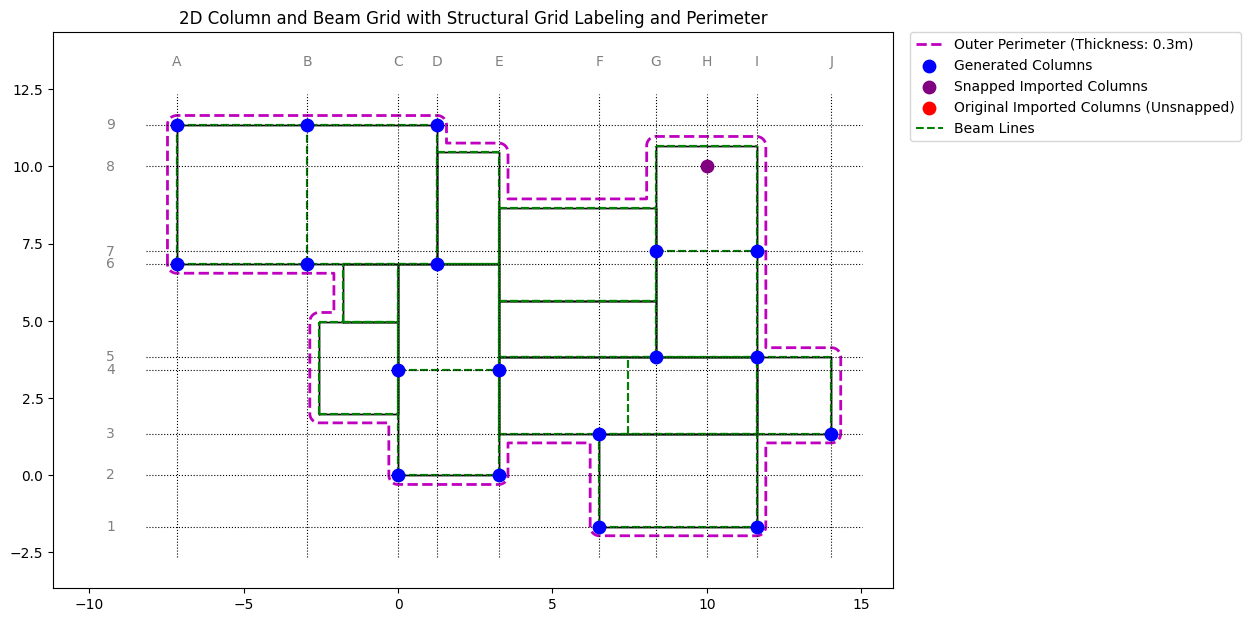

Widget(value='<iframe src="http://localhost:50544/index.html?ui=P_0x1bc42fcccd0_8&reconnect=auto" class="pyvis…

--- Generating data and CSVs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data
✅ nodes.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\nodes.csv
✅ columns.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\columns.csv
✅ beams.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\beams.csv

--- Visualizing data from CSVs ---


In [29]:
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import pyvista as pv
import csv # Import the csv module
import pandas as pd
import plotly.graph_objects as go
from collections import OrderedDict

# --- File path ---
# Using the path from your saved information, adjusted for relative path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.3dm"

# Fallback if the user-provided path doesn't exist, use the original relative path
if not os.path.exists(rhino_path):
    print(f"Warning: Specific Rhino path not found: {rhino_path}. Using default relative path.")
    rhino_path = r"../Reference Files/coconuts.3dm" # This was in your original code, keeping as fallback

if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}. Please ensure the Rhino file exists at the specified path or the relative path.")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract building volume & height without relying on layers
building_volumes = []
wall_breps = []
max_z = 0.0

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        base_pts = [
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]   # Close polygon
        ]
        # Check for valid polygon to avoid errors with degenerate meshes
        if len(base_pts) >= 4:
            poly = Polygon(base_pts)
            if poly.is_valid and not poly.is_empty:
                building_volumes.append(poly)
                wall_breps.append({'polygon': poly, 'bbox': bbox})
                max_z = max(max_z, bbox.Max.Z)

if not building_volumes:
    raise RuntimeError("No valid Mesh geometry found in the model to derive building volumes.")

print(f"Detected {len(building_volumes)} building volumes. Max Z height: {max_z:.2f}m")

# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
combined_building_polygon = MultiPolygon(building_volumes)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon': # This case should ideally be handled by the max(geoms) above
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting
detected_rooms = sorted([(poly, poly.area) for poly in building_volumes], key=lambda x: -x[1])

# Structural logic
MaxS = 6.0
MinS = 3.0

# --- Define imported_columns for demonstration purposes ---
# In a real scenario, this would come from an actual import
imported_columns = [
    (10.0, 10.0), (10.0, 20.0), (20.0, 10.0), (20.0, 20.0)
]
# --- End imported_columns definition ---

columns = []
corrected_columns = []
available_imported = imported_columns.copy()
existing_columns = imported_columns.copy() # Start with imported columns as existing
beams = []

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    # Calculate divisions, ensuring at least one division if dimension is larger than MaxS
    divisions_x = int(np.ceil(width / MaxS)) if width > MaxS else 1
    divisions_y = int(np.ceil(height / MaxS)) if height > MaxS else 1
    
    # Ensure linspace works even if divisions_x or divisions_y is 0 (e.g., for very small rooms)
    x_points = np.linspace(minx, maxx, divisions_x + 1) if divisions_x > 0 else [minx]
    y_points = np.linspace(miny, maxy, divisions_y + 1) if divisions_y > 0 else [miny]
    
    # Generate candidate column points within the room's bounding box
    room_candidates = [(x, y) for x in x_points for y in y_points]

    for col_candidate in room_candidates:
        snap = False
        # Check if candidate snaps to an imported column
        for imp_col_idx, imp_col in enumerate(available_imported):
            if np.linalg.norm(np.array(col_candidate) - np.array(imp_col)) < MinS:
                corrected_columns.append(imp_col) # Use the original imported column's coordinates
                
                # Remove the snapped imported column from available list
                available_imported.pop(imp_col_idx) 
                snap = True
                break
        
        # If not snapped, check if it's far enough from existing columns
        if not snap and all(np.linalg.norm(np.array(col_candidate) - np.array(exist_col)) >= MinS for exist_col in existing_columns):
            columns.append(col_candidate)
            existing_columns.append(col_candidate) # Add newly generated column to existing

    # Generate beams based on the grid points
    for x in x_points:
        # Create the LineString object once for intersection
        vertical_line = LineString([(x, miny), (x, maxy)])
        
        # Ensure beam segment stays within the room's y-bounds
        # Pass the LineString object directly to .intersection()
        intersection_result = room_poly.intersection(vertical_line)
        
        y_intersect_min = miny
        y_intersect_max = maxy
        
        if not intersection_result.is_empty:
            if intersection_result.geom_type == 'LineString':
                y_intersect_min = min(p[1] for p in intersection_result.coords) # Corrected: p[1] instead of p.y
                y_intersect_max = max(p[1] for p in intersection_result.coords) # Corrected: p[1] instead of p.y
            elif intersection_result.geom_type == 'MultiLineString':
                # For MultiLineString, collect all y-coordinates and find min/max
                all_y_coords = []
                for segment in intersection_result.geoms:
                    all_y_coords.extend([p[1] for p in segment.coords]) # Corrected: p[1] instead of p.y
                if all_y_coords:
                    y_intersect_min = min(all_y_coords)
                    y_intersect_max = max(all_y_coords)
            elif intersection_result.geom_type == 'Point':
                # If it's just a point, effectively no beam segment
                continue

        if abs(y_intersect_max - y_intersect_min) > 1e-6: # Only add if length is significant
            beams.append(((x, y_intersect_min), (x, y_intersect_max)))

    for y in y_points:
        # Create the LineString object once for intersection
        horizontal_line = LineString([(minx, y), (maxx, y)])

        # Ensure beam segment stays within the room's x-bounds
        # Pass the LineString object directly to .intersection()
        intersection_result = room_poly.intersection(horizontal_line)

        x_intersect_min = minx
        x_intersect_max = maxx

        if not intersection_result.is_empty:
            if intersection_result.geom_type == 'LineString':
                x_intersect_min = min(p[0] for p in intersection_result.coords) # Corrected: p[0] instead of p.x
                x_intersect_max = max(p[0] for p in intersection_result.coords) # Corrected: p[0] instead of p.x
            elif intersection_result.geom_type == 'MultiLineString':
                all_x_coords = []
                for segment in intersection_result.geoms:
                    all_x_coords.extend([p[0] for p in segment.coords]) # Corrected: p[0] instead of p.x
                if all_x_coords:
                    x_intersect_min = min(all_x_coords)
                    x_intersect_max = max(all_x_coords)
            elif intersection_result.geom_type == 'Point':
                continue

        if abs(x_intersect_max - x_intersect_min) > 1e-6: # Only add if length is significant
            beams.append(((x_intersect_min, y), (x_intersect_max, y)))

    # Add room corners as columns if not too close to existing ones
    for corner in list(room_poly.exterior.coords):
        # Only add if the corner is within the room and not too close to an existing column
        if room_poly.contains(Point(corner)) and all(np.linalg.norm(np.array(corner) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
            columns.append(corner)
            existing_columns.append(corner)

# Add any remaining imported columns that were not snapped to
for imp_col in available_imported:
    if all(np.linalg.norm(np.array(imp_col) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
        columns.append(imp_col)
        existing_columns.append(imp_col)

# Combine all base columns (generated + corrected/snapped + unsnapped imported)
all_base_columns = list(set(columns + corrected_columns)) # Use set to remove duplicates

# --- COLUMN GRID NUMBERING LOGIC ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
# Adjusted limits to provide more space for labels without cutting off the perimeter
# Increased padding for labels
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Snapped imported columns
if corrected_columns:
    cx, cy = zip(*corrected_columns)
    ax.scatter(cx, cy, c='purple', s=80, label='Snapped Imported Columns', zorder=7)

# Original imported columns (only those that were not snapped to a generated column)
un_snapped_imported_columns = [col for col in imported_columns if col not in corrected_columns]
if un_snapped_imported_columns:
    ix, iy = zip(*un_snapped_imported_columns)
    ax.scatter(ix, iy, c='red', s=80, label='Original Imported Columns (Unsnapped)', zorder=10)


# Only draw one label for beam lines in 2D
if beams:
    # To avoid drawing every beam twice for legend, draw one placeholder
    if beams:
        # Get the first beam and draw it for legend purposes
        first_beam_coords = beams[0]
        x1_sample, y1_sample = first_beam_coords[0]
        x2_sample, y2_sample = first_beam_coords[1]
        ax.plot([x1_sample, x2_sample], [y1_sample, y2_sample], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
        
        # Now draw all beams without adding more labels
        for (x1, y1), (x2, y2) in beams:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5)


# Draw and label grid lines
# Increased offset for labels for better clarity
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

# Using subplots_adjust for explicit margin control instead of tight_layout
# This gives more precise control over the margins for labels
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1) # Adjusted values for left and top margin


ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()

# PyVista 3D visualization
plotter = pv.Plotter(title="3D Structural System")

# Define sizes for structural elements (now dimensions for rectangular prisms)
column_width = 0.3
column_depth = 0.3

beam_width = 0.25
beam_depth = 0.35

slab_thickness = 0.20

slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05

# Utility function for wall height (re-used from your code)
def get_wall_height(x, y, wall_data, global_max_z):
    pt = Point(x, y)
    closest_wall_height = global_max_z # Default to global max_z if no specific wall found
    min_dist_to_wall = float('inf')

    for wall in wall_data:
        if wall['polygon'].contains(pt):
            return wall['bbox'].Max.Z # If the point is inside a wall's base polygon
        
        dist = wall['polygon'].exterior.distance(pt)
        if dist < min_dist_to_wall:
            min_dist_to_wall = dist
            closest_wall_height = wall['bbox'].Max.Z
    
    return closest_wall_height # Return the height of the closest wall or global max_z


# Calculate story heights per room, since rooms might have different max Z
room_story_heights = {}
for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps, max_z)
    
    num_vertical_sections = num_floors 

    if num_vertical_sections > 0:
        story_height = room_specific_max_z / num_vertical_sections
    else:
        story_height = room_specific_max_z # Should not happen if num_floors >= 1
    
    room_story_heights[room_poly.wkt] = story_height


# --- Define Z-levels for each floor in a more structured way ---
floor_z_levels = {} 
for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps, max_z)

    current_room_floor_z = []
    
    # Slab 0: Ground Slab (always at Z=0)
    current_room_floor_z.append((0.0, slab_thickness))

    if num_floors > 0: # Only generate intermediate and roof slabs if there's at least 1 floor
        story_height = room_story_heights.get(room_poly.wkt, max_z)
        
        # Intermediate Slabs (from 1 to num_floors-1)
        for i in range(1, num_floors): 
            slab_base_z = i * story_height
            slab_top_z = slab_base_z + slab_thickness

            # Clamp slab_top_z to room_specific_max_z
            if slab_top_z > room_specific_max_z + 1e-6:
                slab_top_z = room_specific_max_z
                slab_base_z = max(slab_base_z, slab_top_z - slab_thickness) # Re-calculate base if top clamped

            if slab_top_z - slab_base_z < 1e-6: # Skip if thickness is negligible
                continue
                
            current_room_floor_z.append((slab_base_z, slab_top_z))
        
        # Last Slab: Roof Slab (at room_specific_max_z)
        roof_slab_top_z = room_specific_max_z 
        roof_slab_base_z = roof_slab_top_z - slab_thickness
        
        # Adjust if roof slab overlaps with the last intermediate slab
        if current_room_floor_z:
            last_slab_top = current_room_floor_z[-1][1]
            if roof_slab_base_z < last_slab_top + 1e-6: # If roof base is below or too close to last slab top
                roof_slab_base_z = last_slab_top # Start roof slab right above last intermediate slab
                roof_slab_top_z = roof_slab_base_z + slab_thickness
                if roof_slab_top_z > room_specific_max_z + 1e-6: # Re-clamp if new top exceeds room max_z
                    roof_slab_top_z = room_specific_max_z
                    roof_slab_base_z = max(roof_slab_top_z - slab_thickness, last_slab_top) # Ensure not thinner than thickness if possible

        if roof_slab_top_z - roof_slab_base_z < 1e-6: # Skip if roof slab is negligible
            pass
        else:
            current_room_floor_z.append((roof_slab_base_z, roof_slab_top_z))

    floor_z_levels[room_poly.wkt] = current_room_floor_z

# --- Add Slabs ---
for room_poly, _ in detected_rooms:
    room_floor_data = floor_z_levels.get(room_poly.wkt, [])
    if not room_floor_data:
        continue

    # Buffer the room polygon for slab extension
    extended_room_poly = room_poly.buffer(slab_extension_buffer, join_style=1)
    if extended_room_poly.geom_type == 'MultiPolygon':
        extended_room_poly = max(extended_room_poly.geoms, key=lambda p: p.area)
    elif extended_room_poly.geom_type != 'Polygon':
        continue
    
    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness = slab_top_z - slab_base_z
        if current_slab_thickness < 1e-6:
            continue

        points_3d_for_slab_base = []
        poly_coords = list(extended_room_poly.exterior.coords)
        if poly_coords[0] != poly_coords[-1]:
            poly_coords.append(poly_coords[0]) # Close the polygon
            
        for x, y in poly_coords:
            points_3d_for_slab_base.append([x, y, 0.0]) # Z is 0 for the base mesh, then translate
        
        points_3d_for_slab_base = np.array(points_3d_for_slab_base)

        if len(points_3d_for_slab_base) < 3: # Need at least 3 points for a polygon
            continue

        slab_base_mesh = pv.PolyData(points_3d_for_slab_base)
        
        try:
            triangulated_faces = slab_base_mesh.delaunay_2d().faces
            if triangulated_faces is None or len(triangulated_faces) == 0:
                continue
            slab_base_mesh = pv.PolyData(points_3d_for_slab_base, faces=triangulated_faces)
        except Exception as e:
            print(f"Delaunay triangulation failed for a slab base ({room_poly.bounds}): {e}. Skipping slab.")
            continue

        slab_mesh = slab_base_mesh.extrude(vector=(0, 0, current_slab_thickness), capping=True)
        slab_mesh = slab_mesh.translate((0, 0, slab_base_z))
        
        plotter.add_mesh(slab_mesh, color='sienna', opacity=0.8, smooth_shading=True)


# # --- Data Structures for Export ---
all_nodes_data = {} # (x, y, z) -> "N_ID"
export_columns = [] # List of {"ID": "C0", "i_node": "N0", "j_node": "N1"}
export_beams = [] # List of {"ID": "B0", "i_node": "N0", "j_node": "N1"}
node_id_counter = 0

def get_node_id(x, y, z):
    global node_id_counter
    # Use a tuple (x, y, z) as key, rounded to avoid floating point issues
    rounded_coords = (round(x, 6), round(y, 6), round(z, 6))
    if rounded_coords not in all_nodes_data:
        node_id = f"N{node_id_counter}"
        all_nodes_data[rounded_coords] = node_id
        node_id_counter += 1
    return all_nodes_data[rounded_coords]

# --- Add Columns (and populate export_columns, all_nodes_data) ---
column_id_counter = 0
for x, y in all_base_columns:
    column_room_wkt = None
    # Find which room this column belongs to (or is closest to)
    for room_poly, _ in detected_rooms:
        if Point(x, y).within(room_poly.buffer(1e-3)): # Add a small buffer for containment check
            column_room_wkt = room_poly.wkt
            break
    if column_room_wkt is None:
        # If not strictly within, find the closest room
        min_dist_to_room = float('inf')
        for room_poly, _ in detected_rooms:
            dist = Point(x,y).distance(room_poly)
            if dist < min_dist_to_room:
                min_dist_to_room = dist
                column_room_wkt = room_poly.wkt
        if column_room_wkt is None:
            continue # Should not happen if detected_rooms is not empty

    room_floor_data = floor_z_levels.get(column_room_wkt, [])
    if not room_floor_data or len(room_floor_data) <= 1:
        continue # Need at least two slabs to form a column segment

    # Columns go from the top of one slab to the base of the next
    for i in range(len(room_floor_data) - 1):
        col_base_z = room_floor_data[i][1] # Top of current slab
        col_top_z = room_floor_data[i+1][0] # Base of next slab

        if col_top_z <= col_base_z + 1e-6: # Ensure column has positive length
            continue

        col_min_x = x - column_width / 2
        col_max_x = x + column_width / 2
        col_min_y = y - column_depth / 2
        col_max_y = y + column_depth / 2
        
        column_box = pv.Box([col_min_x, col_max_x, col_min_y, col_max_y, col_base_z, col_top_z])
        plotter.add_mesh(column_box, color='blue', smooth_shading=True)

        # Collect data for export_columns
        i_node_id = get_node_id(x, y, col_base_z)
        j_node_id = get_node_id(x, y, col_top_z)
        export_columns.append({"ID": f"C{column_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
        column_id_counter += 1


# --- Add Beams (and populate export_beams, all_nodes_data) ---
beam_id_counter = 0
# A set to store unique beams to avoid duplicates due to room intersections
unique_beams = set() 

for (x1, y1), (x2, y2) in beams:
    full_beam_line = LineString([(x1, y1), (x2, y2)])

    # Iterate through each floor level (represented by slabs)
    # Beams are typically at the top of the slab, supporting the floor above
    for i in range(len(floor_z_levels.values()) + 1): # Iterate over all possible floor indices
        
        # Determine the Z-level for the beam based on typical floor structure
        # A beam should ideally sit at the top of a slab, supporting the floor above.
        # So we look at the top of each slab as a potential beam Z-level.
        
        beam_level_z = None
        
        # Find a common Z for this beam across rooms it traverses
        # This is a simplification; for complex room interactions,
        # beams might need to be segmented more carefully.
        
        possible_beam_z_levels = []
        for room_poly, _ in detected_rooms:
            room_floor_data = floor_z_levels.get(room_poly.wkt, [])
            if i < len(room_floor_data):
                possible_beam_z_levels.append(room_floor_data[i][1]) # Use slab_top_z
        
        if possible_beam_z_levels:
            # Take the average or min/max if there are slight differences, or the most common
            beam_level_z = np.mean(possible_beam_z_levels) # Simple average
            # Alternatively, if you want precise alignment with a specific room's slab:
            # For this example, let's just make sure the beam is within the building's overall height.
            if beam_level_z > max_z + 1e-6:
                continue # Skip if this beam level is above the building's max height
        else:
            continue # No valid Z-level for this beam line at this floor index

        beam_top_z = beam_level_z
        beam_base_z = beam_top_z - beam_depth 

        if beam_base_z < 0: # Don't go below ground
            beam_base_z = 0
        if beam_top_z <= beam_base_z + 1e-6: # Skip if beam has negligible height
            continue

        # Find intersecting rooms for this beam segment
        relevant_rooms_for_this_beam_level = []
        for room_poly, _ in detected_rooms:
            # Check if the beam line (with a small buffer) intersects the room
            if room_poly.intersects(full_beam_line.buffer(1e-3)):
                # Ensure the beam is at a valid Z level for this room's structure
                room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps, max_z)
                if beam_top_z <= room_specific_max_z + 1e-6: # Beam top should not exceed room height
                    relevant_rooms_for_this_beam_level.append(room_poly)

        if not relevant_rooms_for_this_beam_level:
            continue

        # Intersect the beam line with each relevant room to get segments within rooms
        for room_poly in relevant_rooms_for_this_beam_level:
            intersection = full_beam_line.intersection(room_poly)

            segments_to_draw = []
            if intersection.geom_type == 'LineString':
                segments_to_draw.append(intersection)
            elif intersection.geom_type == 'MultiLineString':
                segments_to_draw.extend(list(intersection.geoms))
            else: # If intersection is a Point, or other geometry, skip
                continue

            for segment in segments_to_draw:
                if not segment.is_empty and segment.length > 1e-6:
                    seg_x1, seg_y1 = segment.coords[0]
                    seg_x2, seg_y2 = segment.coords[-1]

                    # Ensure unique beam segments based on start/end points and Z-level
                    # Using min/max for coordinates for canonical representation
                    coords_pair = tuple(sorted(((round(seg_x1, 6), round(seg_y1, 6)), 
                                                (round(seg_x2, 6), round(seg_y2, 6)))))
                    beam_key = (coords_pair, round(beam_top_z, 6)) # Include Z in uniqueness check

                    if beam_key in unique_beams:
                        continue # Skip if this beam segment has already been processed
                    unique_beams.add(beam_key)

                    # Determine beam bounding box
                    if abs(seg_x1 - seg_x2) > abs(seg_y1 - seg_y2): # Horizontal beam (or more horizontal)
                        beam_min_x = min(seg_x1, seg_x2)
                        beam_max_x = max(seg_x1, seg_x2)
                        beam_center_y = (seg_y1 + seg_y2) / 2
                        beam_min_y = beam_center_y - beam_width / 2
                        beam_max_y = beam_center_y + beam_width / 2
                    else: # Vertical beam (or more vertical)
                        beam_min_y = min(seg_y1, seg_y2)
                        beam_max_y = max(seg_y1, seg_y2)
                        beam_center_x = (seg_x1 + seg_x2) / 2
                        beam_min_x = beam_center_x - beam_width / 2
                        beam_max_x = beam_center_x + beam_width / 2

                    beam_box = pv.Box([beam_min_x, beam_max_x, beam_min_y, beam_max_y, beam_base_z, beam_top_z])

                    # Determine if it's a roof beam
                    is_roof_beam = abs(beam_top_z - room_specific_max_z) < 1e-6 # Check if beam top is at room max Z
                    color = 'green' if is_roof_beam else 'orange' 
                    plotter.add_mesh(beam_box, color=color, smooth_shading=True)

                    # Collect data for export_beams
                    i_node_id = get_node_id(seg_x1, seg_y1, beam_top_z)
                    j_node_id = get_node_id(seg_x2, seg_y2, beam_top_z)
                    export_beams.append({"ID": f"B{beam_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
                    beam_id_counter += 1

# Convert all_nodes_data dictionary to a list of dictionaries for CSV export
final_nodes_data = []
for coords, node_id in all_nodes_data.items():
    final_nodes_data.append({"ID": node_id, "X": coords[0], "Y": coords[1], "Z": coords[2]})

# Actual Brep-based walls visualization (semi-transparent)
def mesh_brep(brep, mesh_type=rhino3dm.MeshType.Any):
    meshes = []
    for face in brep.Faces:
        try:
            m = face.GetMesh(mesh_type)
            if m: meshes.append(m)
        except:
            continue
    return meshes

for obj in model.Objects:
    geom = obj.Geometry
    if isinstance(geom, rhino3dm.Brep):
        meshes = mesh_brep(geom)
        for mesh in meshes:
            pts = [(v.X, v.Y, v.Z) for v in mesh.Vertices]
            faces = []
            for f in mesh.Faces:
                if len(f) == 4:
                    idxs = (f[0], f[1], f[2], f[3])
                else:
                    idxs = (f[0], f[1], f[2])
                faces.append((len(idxs),) + idxs)
            faces_flat = [i for face in faces for i in face]
            if pts and faces_flat: # Ensure points and faces exist
                pv_mesh = pv.PolyData(pts, faces_flat)
                plotter.add_mesh(pv_mesh, color='lightgray', opacity=0.3)

plotter.show_grid()
plotter.show()

# --- Define the relative path for saving CSVs ---
CSV_SAVE_PATH = os.path.join(os.getcwd(), "structural_data") # Saves in a folder named structural_data in current working directory

# --- DATA GENERATION AND CSV EXPORT (Ensuring df_nodes, df_columns, df_beams are saved) ---
print("--- Generating data and CSVs ---")

# Create the target directory if it doesn't exist
os.makedirs(CSV_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(CSV_SAVE_PATH)}")

# --- Export nodes.csv ---
nodes_csv_path = os.path.join(CSV_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(final_nodes_data, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export columns.csv ---
df_columns = pd.DataFrame(export_columns) # export_columns already contains ID, i_node, j_node
# Add length to columns DataFrame
col_lengths = []
for idx, row in df_columns.iterrows():
    p1 = df_nodes.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']].values
    p2 = df_nodes.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']].values
    col_lengths.append(np.linalg.norm(p2 - p1))
df_columns['length'] = col_lengths

columns_csv_path = os.path.join(CSV_SAVE_PATH, "columns.csv")
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export beams.csv ---
df_beams = pd.DataFrame(export_beams) # export_beams already contains ID, i_node, j_node
# Add length to beams DataFrame
beam_lengths = []
for idx, row in df_beams.iterrows():
    p1 = df_nodes.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']].values
    p2 = df_nodes.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']].values
    beam_lengths.append(np.linalg.norm(p2 - p1)) # Corrected: numpy.linalg.norm
df_beams['length'] = beam_lengths

beams_csv_path = os.path.join(CSV_SAVE_PATH, "beams.csv")
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")


# --- 3D PLOTLY VISUALIZATION (LOADING FROM SAVED CSVs) ---
print("\n--- Visualizing data from CSVs ---")

# 1. Load the generated CSV files into pandas DataFrames
try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print(f"Expected paths: {nodes_csv_path}, {columns_csv_path}, {beams_csv_path}")
    print("Please run the data generation part of the code first if you haven't.")
    exit() # Exit if files are not found

# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes_loaded.set_index('ID')
# 
# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    column_plotly_lines_x.extend([p1[0], p2[0], None])
    column_plotly_lines_y.extend([p1[1], p2[1], None])
    column_plotly_lines_z.extend([p1[2], p2[2], None])

# Add Beams to line data
for index, row in df_beams_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_plotly_lines_x.extend([p1[0], p2[0], None])
    beam_plotly_lines_y.extend([p1[1], p2[1], None])
    beam_plotly_lines_z.extend([p1[2], p2[2], None])

# Prepare slab data for Plotly (using the `wall_breps`, `detected_rooms`, `num_floors`, `max_z` from prior code)
slab_meshes = []
slab_thickness = 0.20 # Use the same thickness as defined earlier for consistency
slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05 # Use the same buffer as defined earlier

# Use detected_rooms and wall_breps from your previous code execution
for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps, max_z)

    if num_floors <= 0:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer, join_style=1)
    if extended_room_poly.geom_type == 'MultiPolygon':
        extended_room_poly = max(extended_room_poly.geoms, key=lambda p: p.area)
    elif extended_room_poly.geom_type != 'Polygon':
        continue

    # Use the same floor_z_levels logic as PyVista for consistency
    room_floor_data = floor_z_levels.get(room_poly.wkt, [])

    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness_for_this_level = slab_top_z - slab_base_z
        if current_slab_thickness_for_this_level < 1e-6:
            continue

        # Convert polygon bounds to a rectangular slab for Plotly for simplicity
        minx_s, miny_s, maxx_s, maxy_s = extended_room_poly.bounds
        
        # Define vertices for the top and bottom faces of the slab
        # (minx_s, miny_s, Z)
        # (maxx_s, miny_s, Z)
        # (maxx_s, maxy_s, Z)
        # (minx_s, maxy_s, Z)
        
        x_slab = [minx_s, maxx_s, maxx_s, minx_s, minx_s, maxx_s, maxx_s, minx_s]
        y_slab = [miny_s, miny_s, maxy_s, maxy_s, miny_s, miny_s, maxy_s, maxy_s]
        z_slab = [slab_base_z] * 4 + [slab_top_z] * 4

        # Define faces for a cuboid (12 triangles, 6 faces)
        # Front face (0,1,2,3) -> 0-1-2, 0-2-3
        # Back face (4,5,6,7) -> 4-5-6, 4-6-7 (note: plotly expects counter-clockwise for normal)
        # Bottom face (0,1,5,4)
        # Top face (3,2,6,7)
        # Left face (0,3,7,4)
        # Right face (1,2,6,5)
        
        # Indices for the vertices (0-7)
        # Each face is made of two triangles
        i_coords = [0, 0, 4, 4, 0, 0, 1, 1, 3, 3, 2, 2]
        j_coords = [1, 2, 5, 6, 3, 4, 2, 5, 0, 7, 6, 5]
        k_coords = [2, 3, 6, 7, 7, 5, 6, 4, 4, 7, 5, 6]

        slab_meshes.append(go.Mesh3d(
            x=x_slab,
            y=y_slab,
            z=z_slab,
            i=i_coords,
            j=j_coords,
            k=k_coords,
            color='sienna',
            opacity=0.5, # Slightly more transparent than columns/beams
            name=f'Floor {i} Slab'
        ))

# --- Create Plotly Figure ---
fig = go.Figure()

# Add Nodes as scatter points
fig.add_trace(go.Scatter3d(
    x=df_nodes_loaded['X'],
    y=df_nodes_loaded['Y'],
    z=df_nodes_loaded['Z'],
    mode='markers',
    marker=dict(size=4, color='black'),
    name='Nodes',
    hoverinfo='text',
    text=[f"Node ID: {row['ID']}<br>Coords: ({row['X']:.2f}, {row['Y']:.2f}, {row['Z']:.2f})" for idx, row in df_nodes_loaded.iterrows()]
))

# Add Columns as lines
fig.add_trace(go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=8),
    name='Columns'
))

# Add Beams as lines
fig.add_trace(go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='orange', width=5),
    name='Beams'
))

# Add Slabs as meshes
for slab_mesh in slab_meshes:
    fig.add_trace(slab_mesh)

# Update layout for better visualization
fig.update_layout(
    title='3D Structural Model from CSV Data',
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)',
        aspectmode='data' # This ensures correct aspect ratio for 3D
    ),
    showlegend=True
)

fig.show()

Detected 22 building volumes. Max Z height: 6.00m


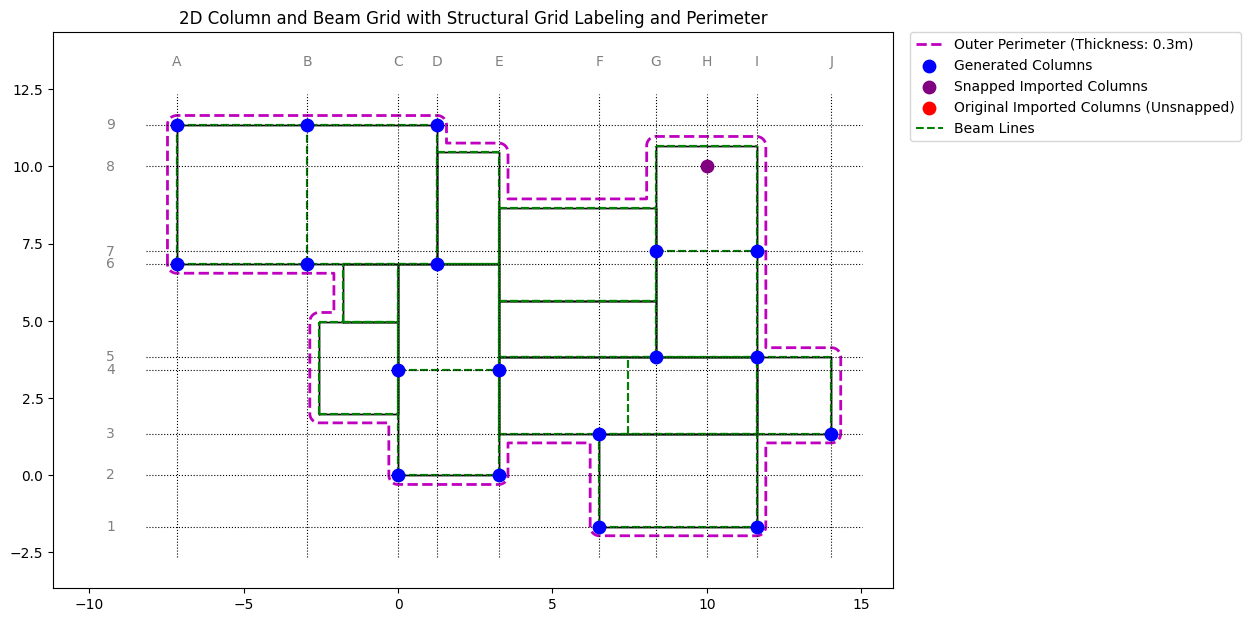

--- Generating data and CSVs ---
Ensuring directory exists: c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data
✅ nodes.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\nodes.csv
✅ columns.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\columns.csv
✅ beams.csv written to c:\Users\papad\Documents\GitHub\Octopusie\Combined Scripts\structural_data\beams.csv

--- Visualizing data from CSVs ---


ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter3d: 'fill'

Did you mean "ids"?

    Valid properties:
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on Chart Studio Cloud for
            `customdata`.
        error_x
            :class:`plotly.graph_objects.scatter3d.ErrorX` instance
            or dict with compatible properties
        error_y
            :class:`plotly.graph_objects.scatter3d.ErrorY` instance
            or dict with compatible properties
        error_z
            :class:`plotly.graph_objects.scatter3d.ErrorZ` instance
            or dict with compatible properties
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on Chart Studio Cloud for
            `hoverinfo`.
        hoverlabel
            :class:`plotly.graph_objects.scatter3d.Hoverlabel`
            instance or dict with compatible properties
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}" as well as %{xother}, {%_xother},
            {%_xother_}, {%xother_}. When showing info for several
            points, "xother" will be added to those with different
            x positions from the first point. An underscore before
            or after "(x|y)other" will add a space on that side,
            only when this field is shown. Numbers are formatted
            using d3-format's syntax %{variable:d3-format}, for
            example "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. The variables available in
            `hovertemplate` are the ones emitted as event data
            described at this link
            https://plotly.com/javascript/plotlyjs-events/#event-
            data. Additionally, every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `hovertemplate`.
        hovertext
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on Chart Studio Cloud for
            `hovertext`.
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on Chart Studio Cloud for
            `ids`.
        legend
            Sets the reference to a legend to show this trace in.
            References to these legends are "legend", "legend2",
            "legend3", etc. Settings for these legends are set in
            the layout, under `layout.legend`, `layout.legend2`,
            etc.
        legendgroup
            Sets the legend group for this trace. Traces and shapes
            part of the same legend group hide/show at the same
            time when toggling legend items.
        legendgrouptitle
            :class:`plotly.graph_objects.scatter3d.Legendgrouptitle
            ` instance or dict with compatible properties
        legendrank
            Sets the legend rank for this trace. Items and groups
            with smaller ranks are presented on top/left side while
            with "reversed" `legend.traceorder` they are on
            bottom/right side. The default legendrank is 1000, so
            that you can use ranks less than 1000 to place certain
            items before all unranked items, and ranks greater than
            1000 to go after all unranked items. When having
            unranked or equal rank items shapes would be displayed
            after traces i.e. according to their order in data and
            layout.
        legendwidth
            Sets the width (in px or fraction) of the legend for
            this trace.
        line
            :class:`plotly.graph_objects.scatter3d.Line` instance
            or dict with compatible properties
        marker
            :class:`plotly.graph_objects.scatter3d.Marker` instance
            or dict with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appears as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        projection
            :class:`plotly.graph_objects.scatter3d.Projection`
            instance or dict with compatible properties
        scene
            Sets a reference between this trace's 3D coordinate
            system and a 3D scene. If "scene" (the default value),
            the (x,y,z) coordinates refer to `layout.scene`. If
            "scene2", the (x,y,z) coordinates refer to
            `layout.scene2`, and so on.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stream
            :class:`plotly.graph_objects.scatter3d.Stream` instance
            or dict with compatible properties
        surfaceaxis
            If "-1", the scatter points are not fill with a surface
            If 0, 1, 2, the scatter points are filled with a
            Delaunay surface about the x, y, z respectively.
        surfacecolor
            Sets the surface fill color.
        text
            Sets text elements associated with each (x,y,z)
            triplet. If a single string, the same string appears
            over all the data points. If an array of string, the
            items are mapped in order to the this trace's (x,y,z)
            coordinates. If trace `hoverinfo` contains a "text"
            flag and "hovertext" is not set, these elements will be
            seen in the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on Chart Studio Cloud for
            `textposition`.
        textsrc
            Sets the source reference on Chart Studio Cloud for
            `text`.
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}".
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format
            for details on the formatting syntax. Dates are
            formatted using d3-time-format's syntax
            %{variable|d3-time-format}, for example "Day:
            %{2019-01-01|%A}". https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format for details on the
            date formatting syntax. Every attributes that can be
            specified per-point (the ones that are `arrayOk: true`)
            are available.
        texttemplatesrc
            Sets the source reference on Chart Studio Cloud for
            `texttemplate`.
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xhoverformat
            Sets the hover text formatting rulefor `x`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `xaxis.hoverformat`.
        xsrc
            Sets the source reference on Chart Studio Cloud for
            `x`.
        y
            Sets the y coordinates.
        ycalendar
            Sets the calendar system to use with `y` date data.
        yhoverformat
            Sets the hover text formatting rulefor `y`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `yaxis.hoverformat`.
        ysrc
            Sets the source reference on Chart Studio Cloud for
            `y`.
        z
            Sets the z coordinates.
        zcalendar
            Sets the calendar system to use with `z` date data.
        zhoverformat
            Sets the hover text formatting rulefor `z`  using d3
            formatting mini-languages which are very similar to
            those in Python. For numbers, see:
            https://github.com/d3/d3-format/tree/v1.4.5#d3-format.
            And for dates see: https://github.com/d3/d3-time-
            format/tree/v2.2.3#locale_format. We add two items to
            d3's date formatter: "%h" for half of the year as a
            decimal number as well as "%{n}f" for fractional
            seconds with n digits. For example, *2016-10-13
            09:15:23.456* with tickformat "%H~%M~%S.%2f" would
            display *09~15~23.46*By default the values are
            formatted using `zaxis.hoverformat`.
        zsrc
            Sets the source reference on Chart Studio Cloud for
            `z`.
        
Did you mean "ids"?

Bad property path:
fill
^^^^

In [31]:
import rhino3dm
import os
import numpy as np
from shapely.geometry import Polygon, Point, MultiPolygon, LineString
import matplotlib.pyplot as plt
import csv
import pandas as pd
import plotly.graph_objects as go
from collections import OrderedDict

# --- File path ---
# Using the path from your saved information, adjusted for relative path
rhino_path = r"C:\Users\papad\Documents\GitHub\Octopusie\Reference Files\coconuts.3dm"

# Fallback if the user-provided path doesn't exist, use the original relative path
if not os.path.exists(rhino_path):
    print(f"Warning: Specific Rhino path not found: {rhino_path}. Using default relative path.")
    rhino_path = r"../Reference Files/coconuts.3dm" # This was in your original code, keeping as fallback

if not os.path.exists(rhino_path):
    raise FileNotFoundError(f"File not found: {rhino_path}. Please ensure the Rhino file exists at the specified path or the relative path.")

# Load model
model = rhino3dm.File3dm.Read(rhino_path)

# Extract building volume & height without relying on layers
building_volumes = []
wall_breps_data = [] # Changed name to avoid conflict with `wall_breps` function
max_z = 0.0

for obj in model.Objects:
    geom = obj.Geometry
    if geom.ObjectType == rhino3dm.ObjectType.Mesh:
        bbox = geom.GetBoundingBox()
        base_pts = [
            [bbox.Min.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Min.Y],
            [bbox.Max.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Max.Y],
            [bbox.Min.X, bbox.Min.Y]   # Close polygon
        ]
        # Check for valid polygon to avoid errors with degenerate meshes
        if len(base_pts) >= 4:
            poly = Polygon(base_pts)
            if poly.is_valid and not poly.is_empty:
                building_volumes.append(poly)
                wall_breps_data.append({'polygon': poly, 'bbox': bbox})
                max_z = max(max_z, bbox.Max.Z)

if not building_volumes:
    raise RuntimeError("No valid Mesh geometry found in the model to derive building volumes.")

print(f"Detected {len(building_volumes)} building volumes. Max Z height: {max_z:.2f}m")

# Ask for number of floors
while True:
    try:
        num_floors = int(input("How many floors does the building have? (e.g., 2 for ground + 1 middle + roof): "))
        if num_floors < 1:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive integer for the number of floors.")

# --- Section for perimeter line and wall thickness ---
while True:
    try:
        wall_thickness = float(input("Enter desired wall thickness for the perimeter (e.g., 0.3): "))
        if wall_thickness <= 0:
            raise ValueError
        break
    except ValueError:
        print("Please enter a valid positive number for wall thickness.")

# Combine all building polygons into a single MultiPolygon
combined_building_polygon = MultiPolygon(building_volumes)

# Get the exterior boundary of the combined building and offset it
try:
    exterior_perimeter = combined_building_polygon.buffer(wall_thickness, join_style=1) # join_style=1 for mitered joints
except Exception as e:
    print(f"Could not buffer the building outline. Error: {e}")
    exterior_perimeter = None

# If the buffer operation results in a MultiPolygon, get the largest component
if exterior_perimeter and exterior_perimeter.geom_type == 'MultiPolygon':
    exterior_perimeter = max(exterior_perimeter.geoms, key=lambda p: p.area)

perimeter_line_coords = []
if exterior_perimeter:
    if exterior_perimeter.geom_type == 'Polygon':
        # Extract the exterior ring coordinates
        perimeter_line_coords = list(exterior_perimeter.exterior.coords)
    elif exterior_perimeter.geom_type == 'MultiPolygon': # This case should ideally be handled by the max(geoms) above
        perimeter_line_coords = list(exterior_perimeter.geoms[0].exterior.coords)
    else:
        print("Warning: The buffered perimeter is not a Polygon or MultiPolygon. Cannot extract line coordinates.")

# --- End perimeter section ---

# Room sorting
detected_rooms = sorted([(poly, poly.area) for poly in building_volumes], key=lambda x: -x[1])

# Structural logic
MaxS = 6.0
MinS = 3.0

# --- Define imported_columns for demonstration purposes ---
# In a real scenario, this would come from an actual import
imported_columns = [
    (10.0, 10.0), (10.0, 20.0), (20.0, 10.0), (20.0, 20.0)
]
# --- End imported_columns definition ---

columns = []
corrected_columns = []
available_imported = imported_columns.copy()
existing_columns = imported_columns.copy() # Start with imported columns as existing
beams = []

for room_poly, _ in detected_rooms:
    minx, miny, maxx, maxy = room_poly.bounds
    width, height = maxx - minx, maxy - miny
    
    # Calculate divisions, ensuring at least one division if dimension is larger than MaxS
    divisions_x = int(np.ceil(width / MaxS)) if width > MaxS else 1
    divisions_y = int(np.ceil(height / MaxS)) if height > MaxS else 1
    
    # Ensure linspace works even if divisions_x or divisions_y is 0 (e.g., for very small rooms)
    x_points = np.linspace(minx, maxx, divisions_x + 1) if divisions_x > 0 else [minx]
    y_points = np.linspace(miny, maxy, divisions_y + 1) if divisions_y > 0 else [miny]
    
    # Generate candidate column points within the room's bounding box
    room_candidates = [(x, y) for x in x_points for y in y_points]

    for col_candidate in room_candidates:
        snap = False
        # Check if candidate snaps to an imported column
        for imp_col_idx, imp_col in enumerate(available_imported):
            if np.linalg.norm(np.array(col_candidate) - np.array(imp_col)) < MinS:
                corrected_columns.append(imp_col) # Use the original imported column's coordinates
                
                # Remove the snapped imported column from available list
                available_imported.pop(imp_col_idx) 
                snap = True
                break
        
        # If not snapped, check if it's far enough from existing columns
        if not snap and all(np.linalg.norm(np.array(col_candidate) - np.array(exist_col)) >= MinS for exist_col in existing_columns):
            columns.append(col_candidate)
            existing_columns.append(col_candidate) # Add newly generated column to existing

    # Generate beams based on the grid points
    for x in x_points:
        # Create the LineString object once for intersection
        vertical_line = LineString([(x, miny), (x, maxy)])
        
        # Ensure beam segment stays within the room's y-bounds
        # Pass the LineString object directly to .intersection()
        intersection_result = room_poly.intersection(vertical_line)
        
        y_intersect_min = miny
        y_intersect_max = maxy
        
        if not intersection_result.is_empty:
            if intersection_result.geom_type == 'LineString':
                y_intersect_min = min(p[1] for p in intersection_result.coords)
                y_intersect_max = max(p[1] for p in intersection_result.coords)
            elif intersection_result.geom_type == 'MultiLineString':
                # For MultiLineString, collect all y-coordinates and find min/max
                all_y_coords = []
                for segment in intersection_result.geoms:
                    all_y_coords.extend([p[1] for p in segment.coords])
                if all_y_coords:
                    y_intersect_min = min(all_y_coords)
                    y_intersect_max = max(all_y_coords)
            elif intersection_result.geom_type == 'Point':
                # If it's just a point, effectively no beam segment
                continue

        if abs(y_intersect_max - y_intersect_min) > 1e-6: # Only add if length is significant
            beams.append(((x, y_intersect_min), (x, y_intersect_max)))

    for y in y_points:
        # Create the LineString object once for intersection
        horizontal_line = LineString([(minx, y), (maxx, y)])

        # Ensure beam segment stays within the room's x-bounds
        # Pass the LineString object directly to .intersection()
        intersection_result = room_poly.intersection(horizontal_line)

        x_intersect_min = minx
        x_intersect_max = maxx

        if not intersection_result.is_empty:
            if intersection_result.geom_type == 'LineString':
                x_intersect_min = min(p[0] for p in intersection_result.coords)
                x_intersect_max = max(p[0] for p in intersection_result.coords)
            elif intersection_result.geom_type == 'MultiLineString':
                all_x_coords = []
                for segment in intersection_result.geoms:
                    all_x_coords.extend([p[0] for p in segment.coords])
                if all_x_coords:
                    x_intersect_min = min(all_x_coords)
                    x_intersect_max = max(all_x_coords)
            elif intersection_result.geom_type == 'Point':
                continue

        if abs(x_intersect_max - x_intersect_min) > 1e-6: # Only add if length is significant
            beams.append(((x_intersect_min, y), (x_intersect_max, y)))

    # Add room corners as columns if not too close to existing ones
    for corner in list(room_poly.exterior.coords):
        # Only add if the corner is within the room and not too close to an existing column
        if room_poly.contains(Point(corner)) and all(np.linalg.norm(np.array(corner) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
            columns.append(corner)
            existing_columns.append(corner)

# Add any remaining imported columns that were not snapped to
for imp_col in available_imported:
    if all(np.linalg.norm(np.array(imp_col) - np.array(exist_col)) >= MinS * 0.5 for exist_col in existing_columns):
        columns.append(imp_col)
        existing_columns.append(imp_col)

# Combine all base columns (generated + corrected/snapped + unsnapped imported)
all_base_columns = list(set(columns + corrected_columns)) # Use set to remove duplicates

# --- COLUMN GRID NUMBERING LOGIC ---
# Get unique X and Y coordinates from all generated/snapped columns for grid lines
grid_xs = sorted(list(set([col[0] for col in all_base_columns])))
grid_ys = sorted(list(set([col[1] for col in all_base_columns])))

# Create mapping for X-coordinates to letters (A, B, C...)
x_grid_labels = {x: chr(65 + i) for i, x in enumerate(grid_xs)}
# Create mapping for Y-coordinates to numbers (1, 2, 3...)
y_grid_labels = {y: i + 1 for i, y in enumerate(grid_ys)}

# Determine the actual min/max X/Y of the columns for drawing grid lines
col_min_x_extent = min(col[0] for col in all_base_columns) if all_base_columns else 0
col_max_x_extent = max(col[0] for col in all_base_columns) if all_base_columns else 0
col_min_y_extent = min(col[1] for col in all_base_columns) if all_base_columns else 0
col_max_y_extent = max(col[1] for col in all_base_columns) if all_base_columns else 0

# Add a small buffer to the column extents for drawing grid lines
grid_extent_buffer = 1.0 # Adjusted for better visual spacing
col_min_x_extent -= grid_extent_buffer
col_max_x_extent += grid_extent_buffer
col_min_y_extent -= grid_extent_buffer
col_max_y_extent += grid_extent_buffer

# Determine overall plot limits (consider building outline and grid labels)
# Adjusted limits to provide more space for labels without cutting off the perimeter
# Increased padding for labels
min_x_plot = min(col_min_x_extent, min([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) - 3.0 if perimeter_line_coords else col_min_x_extent - 3.0
max_x_plot = max(col_max_x_extent, max([coord[0] for coord in perimeter_line_coords] + [col[0] for col in all_base_columns])) + 1.0 if perimeter_line_coords else col_max_x_extent + 1.0
min_y_plot = min(col_min_y_extent, min([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) - 1.0 if perimeter_line_coords else col_min_y_extent - 1.0
max_y_plot = max(col_max_y_extent, max([coord[1] for coord in perimeter_line_coords] + [col[1] for col in all_base_columns])) + 2.0 if perimeter_line_coords else col_max_y_extent + 2.0


# 2D Visualization
fig_2d, ax = plt.subplots(figsize=(12, 10)) # Increased figure width for legend

# Room outlines
for poly, _ in detected_rooms:
    px, py = poly.exterior.xy
    ax.plot(px, py, 'k-', linewidth=1)

# Plot the new perimeter line
if perimeter_line_coords:
    px_perimeter, py_perimeter = zip(*perimeter_line_coords)
    ax.plot(px_perimeter, py_perimeter, 'm--', linewidth=2, label=f'Outer Perimeter (Thickness: {wall_thickness}m)')

# Plot all columns
gx, gy = zip(*columns)
ax.scatter(gx, gy, c='blue', s=80, label='Generated Columns', zorder=5)

# Snapped imported columns
if corrected_columns:
    cx, cy = zip(*corrected_columns)
    ax.scatter(cx, cy, c='purple', s=80, label='Snapped Imported Columns', zorder=7)

# Original imported columns (only those that were not snapped to a generated column)
un_snapped_imported_columns = [col for col in imported_columns if col not in corrected_columns]
if un_snapped_imported_columns:
    ix, iy = zip(*un_snapped_imported_columns)
    ax.scatter(ix, iy, c='red', s=80, label='Original Imported Columns (Unsnapped)', zorder=10)


# Only draw one label for beam lines in 2D
if beams:
    # To avoid drawing every beam twice for legend, draw one placeholder
    if beams:
        # Get the first beam and draw it for legend purposes
        first_beam_coords = beams[0]
        x1_sample, y1_sample = first_beam_coords[0]
        x2_sample, y2_sample = first_beam_coords[1]
        ax.plot([x1_sample, x2_sample], [y1_sample, y2_sample], color='green', linestyle='--', linewidth=1.5, label='Beam Lines')
        
        # Now draw all beams without adding more labels
        for (x1, y1), (x2, y2) in beams:
            ax.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=1.5)


# Draw and label grid lines
# Increased offset for labels for better clarity
for x_coord in grid_xs:
    ax.plot([x_coord, x_coord], [col_min_y_extent, col_max_y_extent], 'k:', linewidth=0.8) # Dashed vertical grid line
    ax.text(x_coord, col_max_y_extent + 0.8, x_grid_labels[x_coord], ha='center', va='bottom', fontsize=10, color='gray') # Label at top

for y_coord in grid_ys:
    ax.plot([col_min_x_extent, col_max_x_extent], [y_coord, y_coord], 'k:', linewidth=0.8) # Dashed horizontal grid line
    ax.text(col_min_x_extent - 1.0, y_coord, y_grid_labels[y_coord], ha='right', va='center', fontsize=10, color='gray') # Label on left


ax.set_aspect('equal', 'box')
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.) # Moved legend
plt.title("2D Column and Beam Grid with Structural Grid Labeling and Perimeter")

# Using subplots_adjust for explicit margin control instead of tight_layout
# This gives more precise control over the margins for labels
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.1) # Adjusted values for left and top margin


ax.set_xlim(min_x_plot, max_x_plot)
ax.set_ylim(min_y_plot, max_y_plot)
plt.show()

# Removed PyVista plotter initialization and mesh additions

# Define sizes for structural elements (now dimensions for rectangular prisms)
column_width = 0.3
column_depth = 0.3

beam_width = 0.25
beam_depth = 0.35

slab_thickness = 0.20

slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05

# Utility function for wall height (re-used from your code)
def get_wall_height(x, y, wall_data, global_max_z):
    pt = Point(x, y)
    closest_wall_height = global_max_z # Default to global max_z if no specific wall found
    min_dist_to_wall = float('inf')

    for wall in wall_data:
        if wall['polygon'].contains(pt):
            return wall['bbox'].Max.Z # If the point is inside a wall's base polygon
        
        dist = wall['polygon'].exterior.distance(pt)
        if dist < min_dist_to_wall:
            min_dist_to_wall = dist
            closest_wall_height = wall['bbox'].Max.Z
    
    return closest_wall_height # Return the height of the closest wall or global max_z


# Calculate story heights per room, since rooms might have different max Z
room_story_heights = {}
for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps_data, max_z)
    
    num_vertical_sections = num_floors 

    if num_vertical_sections > 0:
        story_height = room_specific_max_z / num_vertical_sections
    else:
        story_height = room_specific_max_z # Should not happen if num_floors >= 1
    
    room_story_heights[room_poly.wkt] = story_height


# --- Define Z-levels for each floor in a more structured way ---
floor_z_levels = {} 
for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps_data, max_z)

    current_room_floor_z = []
    
    # Slab 0: Ground Slab (always at Z=0)
    current_room_floor_z.append((0.0, slab_thickness))

    if num_floors > 0: # Only generate intermediate and roof slabs if there's at least 1 floor
        story_height = room_story_heights.get(room_poly.wkt, max_z)
        
        # Intermediate Slabs (from 1 to num_floors-1)
        for i in range(1, num_floors): 
            slab_base_z = i * story_height
            slab_top_z = slab_base_z + slab_thickness

            # Clamp slab_top_z to room_specific_max_z
            if slab_top_z > room_specific_max_z + 1e-6:
                slab_top_z = room_specific_max_z
                slab_base_z = max(slab_base_z, slab_top_z - slab_thickness) # Re-calculate base if top clamped

            if slab_top_z - slab_base_z < 1e-6: # Skip if thickness is negligible
                continue
                
            current_room_floor_z.append((slab_base_z, slab_top_z))
        
        # Last Slab: Roof Slab (at room_specific_max_z)
        roof_slab_top_z = room_specific_max_z 
        roof_slab_base_z = roof_slab_top_z - slab_thickness
        
        # Adjust if roof slab overlaps with the last intermediate slab
        if current_room_floor_z:
            last_slab_top = current_room_floor_z[-1][1]
            if roof_slab_base_z < last_slab_top + 1e-6: # If roof base is below or too close to last slab top
                roof_slab_base_z = last_slab_top # Start roof slab right above last intermediate slab
                roof_slab_top_z = roof_slab_base_z + slab_thickness
                if roof_slab_top_z > room_specific_max_z + 1e-6: # Re-clamp if new top exceeds room max_z
                    roof_slab_top_z = room_specific_max_z
                    roof_slab_base_z = max(roof_slab_top_z - slab_thickness, last_slab_top) # Ensure not thinner than thickness if possible

        if roof_slab_top_z - roof_slab_base_z < 1e-6: # Skip if roof slab is negligible
            pass
        else:
            current_room_floor_z.append((roof_slab_base_z, roof_slab_top_z))

    floor_z_levels[room_poly.wkt] = current_room_floor_z

# Removed PyVista slab addition

# --- Data Structures for Export ---
all_nodes_data = {} # (x, y, z) -> "N_ID"
export_columns = [] # List of {"ID": "C0", "i_node": "N0", "j_node": "N1"}
export_beams = [] # List of {"ID": "B0", "i_node": "N0", "j_node": "N1"}
node_id_counter = 0

def get_node_id(x, y, z):
    global node_id_counter
    # Use a tuple (x, y, z) as key, rounded to avoid floating point issues
    rounded_coords = (round(x, 6), round(y, 6), round(z, 6))
    if rounded_coords not in all_nodes_data:
        node_id = f"N{node_id_counter}"
        all_nodes_data[rounded_coords] = node_id
        node_id_counter += 1
    return all_nodes_data[rounded_coords]

# --- Add Columns (and populate export_columns, all_nodes_data) ---
column_id_counter = 0
for x, y in all_base_columns:
    column_room_wkt = None
    # Find which room this column belongs to (or is closest to)
    for room_poly, _ in detected_rooms:
        if Point(x, y).within(room_poly.buffer(1e-3)): # Add a small buffer for containment check
            column_room_wkt = room_poly.wkt
            break
    if column_room_wkt is None:
        # If not strictly within, find the closest room
        min_dist_to_room = float('inf')
        for room_poly, _ in detected_rooms:
            dist = Point(x,y).distance(room_poly)
            if dist < min_dist_to_room:
                min_dist_to_room = dist
                column_room_wkt = room_poly.wkt
        if column_room_wkt is None:
            continue # Should not happen if detected_rooms is not empty

    room_floor_data = floor_z_levels.get(column_room_wkt, [])
    if not room_floor_data or len(room_floor_data) <= 1:
        continue # Need at least two slabs to form a column segment

    # Columns go from the top of one slab to the base of the next
    for i in range(len(room_floor_data) - 1):
        col_base_z = room_floor_data[i][1] # Top of current slab
        col_top_z = room_floor_data[i+1][0] # Base of next slab

        if col_top_z <= col_base_z + 1e-6: # Ensure column has positive length
            continue
        
        # Collect data for export_columns
        i_node_id = get_node_id(x, y, col_base_z)
        j_node_id = get_node_id(x, y, col_top_z)
        export_columns.append({"ID": f"C{column_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
        column_id_counter += 1


# --- Add Beams (and populate export_beams, all_nodes_data) ---
beam_id_counter = 0
# A set to store unique beams to avoid duplicates due to room intersections
unique_beams = set() 

for (x1, y1), (x2, y2) in beams:
    full_beam_line = LineString([(x1, y1), (x2, y2)])

    # Iterate through each floor level (represented by slabs)
    # Beams are typically at the top of the slab, supporting the floor above
    for i in range(len(floor_z_levels.values()) + 1): # Iterate over all possible floor indices
        
        # Determine the Z-level for the beam based on typical floor structure
        beam_level_z = None
        
        # Find a common Z for this beam across rooms it traverses
        possible_beam_z_levels = []
        for room_poly, _ in detected_rooms:
            room_floor_data = floor_z_levels.get(room_poly.wkt, [])
            if i < len(room_floor_data):
                possible_beam_z_levels.append(room_floor_data[i][1]) # Use slab_top_z
        
        if possible_beam_z_levels:
            beam_level_z = np.mean(possible_beam_z_levels) # Simple average
            if beam_level_z > max_z + 1e-6:
                continue # Skip if this beam level is above the building's max height
        else:
            continue # No valid Z-level for this beam line at this floor index

        beam_top_z = beam_level_z
        beam_base_z = beam_top_z - beam_depth 

        if beam_base_z < 0: # Don't go below ground
            beam_base_z = 0
        if beam_top_z <= beam_base_z + 1e-6: # Skip if beam has negligible height
            continue

        # Find intersecting rooms for this beam segment
        relevant_rooms_for_this_beam_level = []
        for room_poly, _ in detected_rooms:
            # Check if the beam line (with a small buffer) intersects the room
            if room_poly.intersects(full_beam_line.buffer(1e-3)):
                # Ensure the beam is at a valid Z level for this room's structure
                room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps_data, max_z)
                if beam_top_z <= room_specific_max_z + 1e-6: # Beam top should not exceed room height
                    relevant_rooms_for_this_beam_level.append(room_poly)

        if not relevant_rooms_for_this_beam_level:
            continue

        # Intersect the beam line with each relevant room to get segments within rooms
        for room_poly in relevant_rooms_for_this_beam_level:
            intersection = full_beam_line.intersection(room_poly)

            segments_to_draw = []
            if intersection.geom_type == 'LineString':
                segments_to_draw.append(intersection)
            elif intersection.geom_type == 'MultiLineString':
                segments_to_draw.extend(list(intersection.geoms))
            else: # If intersection is a Point, or other geometry, skip
                continue

            for segment in segments_to_draw:
                if not segment.is_empty and segment.length > 1e-6:
                    seg_x1, seg_y1 = segment.coords[0]
                    seg_x2, seg_y2 = segment.coords[-1]

                    # Ensure unique beam segments based on start/end points and Z-level
                    # Using min/max for coordinates for canonical representation
                    coords_pair = tuple(sorted(((round(seg_x1, 6), round(seg_y1, 6)), 
                                                (round(seg_x2, 6), round(seg_y2, 6)))))
                    beam_key = (coords_pair, round(beam_top_z, 6)) # Include Z in uniqueness check

                    if beam_key in unique_beams:
                        continue # Skip if this beam segment has already been processed
                    unique_beams.add(beam_key)
                    
                    # Collect data for export_beams
                    i_node_id = get_node_id(seg_x1, seg_y1, beam_top_z)
                    j_node_id = get_node_id(seg_x2, seg_y2, beam_top_z)
                    export_beams.append({"ID": f"B{beam_id_counter}", "i_node": i_node_id, "j_node": j_node_id})
                    beam_id_counter += 1

# Convert all_nodes_data dictionary to a list of dictionaries for CSV export
final_nodes_data = []
for coords, node_id in all_nodes_data.items():
    final_nodes_data.append({"ID": node_id, "X": coords[0], "Y": coords[1], "Z": coords[2]})

# Function to mesh Rhino Brep for Plotly (converts to triangles)
def mesh_brep_for_plotly(brep, mesh_type=rhino3dm.MeshType.Any):
    plotly_meshes = []
    for face in brep.Faces:
        try:
            m = face.GetMesh(mesh_type)
            if m:
                # Extract vertices
                vertices = np.array([(v.X, v.Y, v.Z) for v in m.Vertices])
                
                # Extract faces (triangles only for Mesh3d)
                i_coords, j_coords, k_coords = [], [], []
                for f in m.Faces:
                    # Rhino faces can be quads or triangles. Plotly Mesh3d needs triangles.
                    if len(f) == 3: # Triangle
                        i_coords.append(f[0])
                        j_coords.append(f[1])
                        k_coords.append(f[2])
                    elif len(f) == 4: # Quad, convert to two triangles
                        i_coords.append(f[0])
                        j_coords.append(f[1])
                        k_coords.append(f[2])
                        
                        i_coords.append(f[0])
                        j_coords.append(f[2])
                        k_coords.append(f[3])
                
                if len(vertices) > 0 and len(i_coords) > 0:
                    plotly_meshes.append(go.Mesh3d(
                        x=vertices[:, 0],
                        y=vertices[:, 1],
                        z=vertices[:, 2],
                        i=i_coords,
                        j=j_coords,
                        k=k_coords,
                        color='lightgray',
                        opacity=0.3,
                        name='Original Building Geometry'
                    ))
        except Exception as e:
            print(f"Error meshing BREP face: {e}")
            continue
    return plotly_meshes

# --- Define the relative path for saving CSVs ---
CSV_SAVE_PATH = os.path.join(os.getcwd(), "structural_data") # Saves in a folder named structural_data in current working directory

# --- DATA GENERATION AND CSV EXPORT (Ensuring df_nodes, df_columns, df_beams are saved) ---
print("--- Generating data and CSVs ---")

# Create the target directory if it doesn't exist
os.makedirs(CSV_SAVE_PATH, exist_ok=True)
print(f"Ensuring directory exists: {os.path.abspath(CSV_SAVE_PATH)}")

# --- Export nodes.csv ---
nodes_csv_path = os.path.join(CSV_SAVE_PATH, "nodes.csv")
df_nodes = pd.DataFrame(final_nodes_data, columns=["ID", "X", "Y", "Z"])
df_nodes.to_csv(nodes_csv_path, index=False)
print(f"✅ nodes.csv written to {nodes_csv_path}")

# --- Export columns.csv ---
df_columns = pd.DataFrame(export_columns) # export_columns already contains ID, i_node, j_node
# Add length to columns DataFrame
col_lengths = []
for idx, row in df_columns.iterrows():
    p1 = df_nodes.set_index('ID').loc[row['i_node'], ['X', 'Y', 'Z']].values
    p2 = df_nodes.set_index('ID').loc[row['j_node'], ['X', 'Y', 'Z']].values
    col_lengths.append(np.linalg.norm(p2 - p1))
df_columns['length'] = col_lengths

columns_csv_path = os.path.join(CSV_SAVE_PATH, "columns.csv")
df_columns.to_csv(columns_csv_path, index=False)
print(f"✅ columns.csv written to {columns_csv_path}")

# --- Export beams.csv ---
df_beams = pd.DataFrame(export_beams) # export_beams already contains ID, i_node, j_node
# Add length to beams DataFrame
beam_lengths = []
for idx, row in df_beams.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_lengths.append(np.linalg.norm(p2 - p1)) # Corrected: numpy.linalg.norm
df_beams['length'] = beam_lengths

beams_csv_path = os.path.join(CSV_SAVE_PATH, "beams.csv")
df_beams.to_csv(beams_csv_path, index=False)
print(f"✅ beams.csv written to {beams_csv_path}")


# --- 3D PLOTLY VISUALIZATION (LOADING FROM SAVED CSVs) ---
print("\n--- Visualizing data from CSVs ---")

# 1. Load the generated CSV files into pandas DataFrames
try:
    df_nodes_loaded = pd.read_csv(nodes_csv_path)
    df_columns_loaded = pd.read_csv(columns_csv_path)
    df_beams_loaded = pd.read_csv(beams_csv_path)
except FileNotFoundError:
    print("Error: Make sure 'nodes.csv', 'columns.csv', and 'beams.csv' are in the specified path.")
    print(f"Expected paths: {nodes_csv_path}, {columns_csv_path}, {beams_csv_path}")
    print("Please run the data generation part of the code first if you haven't.")
    exit() # Exit if files are not found

# Create a dictionary for quick node coordinate lookup by ID from the loaded data
node_lookup_loaded = df_nodes_loaded.set_index('ID')
# 
# Prepare data for plotting lines (columns and beams)
column_plotly_lines_x, column_plotly_lines_y, column_plotly_lines_z = [], [], []
beam_plotly_lines_x, beam_plotly_lines_y, beam_plotly_lines_z = [], [], []

# Add Columns to line data
for index, row in df_columns_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    column_plotly_lines_x.extend([p1[0], p2[0], None])
    column_plotly_lines_y.extend([p1[1], p2[1], None])
    column_plotly_lines_z.extend([p1[2], p2[2], None])

# Add Beams to line data
for index, row in df_beams_loaded.iterrows():
    p1 = node_lookup_loaded.loc[row['i_node'], ['X', 'Y', 'Z']]
    p2 = node_lookup_loaded.loc[row['j_node'], ['X', 'Y', 'Z']]
    beam_plotly_lines_x.extend([p1[0], p2[0], None])
    beam_plotly_lines_y.extend([p1[1], p2[1], None])
    beam_plotly_lines_z.extend([p1[2], p2[2], None])

# Prepare slab data for Plotly (using the `wall_breps_data`, `detected_rooms`, `num_floors`, `max_z` from prior code)
plotly_slabs = []
slab_thickness = 0.20 # Use the same thickness as defined earlier for consistency
slab_extension_buffer = max(column_width, column_depth) / 2 + 0.05 # Use the same buffer as defined earlier

for room_poly, _ in detected_rooms:
    room_specific_max_z = get_wall_height(room_poly.centroid.x, room_poly.centroid.y, wall_breps_data, max_z)

    if num_floors <= 0:
        continue

    extended_room_poly = room_poly.buffer(slab_extension_buffer, join_style=1)
    if extended_room_poly.geom_type == 'MultiPolygon':
        extended_room_poly = max(extended_room_poly.geoms, key=lambda p: p.area)
    elif extended_room_poly.geom_type != 'Polygon':
        continue

    room_floor_data = floor_z_levels.get(room_poly.wkt, [])

    for i, (slab_base_z, slab_top_z) in enumerate(room_floor_data):
        current_slab_thickness_for_this_level = slab_top_z - slab_base_z
        if current_slab_thickness_for_this_level < 1e-6:
            continue

        # Get exterior coordinates of the extended room polygon for the slab
        poly_coords = list(extended_room_poly.exterior.coords)
        if poly_coords[0] != poly_coords[-1]:
            poly_coords.append(poly_coords[0]) # Close the polygon

        x_slab = [p[0] for p in poly_coords]
        y_slab = [p[1] for p in poly_coords]
        
        # Bottom surface
        plotly_slabs.append(go.Scatter3d(
            x=x_slab,
            y=y_slab,
            z=[slab_base_z] * len(x_slab),
            mode='lines',
            fill='toself',
            surfaceaxis=2, # Y-axis for surface normal (not strictly needed for flat horizontal)
            opacity=0.7,
            color='sienna',
            name=f'Slab {i}',
            showlegend=False
        ))
        
        # Top surface
        plotly_slabs.append(go.Scatter3d(
            x=x_slab,
            y=y_slab,
            z=[slab_top_z] * len(x_slab),
            mode='lines',
            fill='toself',
            surfaceaxis=2,
            opacity=0.7,
            color='sienna',
            name=f'Slab {i}', # Same name, but will show once if showlegend=True for both
            showlegend=True if i == 0 else False # Show legend only for the first slab to avoid clutter
        ))
        
        # Vertical edges for thickness (optional, but makes it look more like a solid)
        for j in range(len(poly_coords) - 1):
            plotly_slabs.append(go.Scatter3d(
                x=[poly_coords[j][0], poly_coords[j][0]],
                y=[poly_coords[j][1], poly_coords[j][1]],
                z=[slab_base_z, slab_top_z],
                mode='lines',
                line=dict(color='sienna', width=2),
                showlegend=False
            ))


# Original building geometry (walls) from BREPs
plotly_brep_meshes = []
for obj in model.Objects:
    geom = obj.Geometry
    if isinstance(geom, rhino3dm.Brep):
        plotly_brep_meshes.extend(mesh_brep_for_plotly(geom))


# --- Create Plotly Figure ---
fig = go.Figure()

# Add Nodes as scatter points
fig.add_trace(go.Scatter3d(
    x=df_nodes_loaded['X'],
    y=df_nodes_loaded['Y'],
    z=df_nodes_loaded['Z'],
    mode='markers',
    marker=dict(size=4, color='black'),
    name='Nodes',
    hoverinfo='text',
    text=[f"Node ID: {row['ID']}<br>Coords: ({row['X']:.2f}, {row['Y']:.2f}, {row['Z']:.2f})" for idx, row in df_nodes_loaded.iterrows()]
))

# Add Columns as lines
fig.add_trace(go.Scatter3d(
    x=column_plotly_lines_x,
    y=column_plotly_lines_y,
    z=column_plotly_lines_z,
    mode='lines',
    line=dict(color='blue', width=8),
    name='Columns'
))

# Add Beams as lines
fig.add_trace(go.Scatter3d(
    x=beam_plotly_lines_x,
    y=beam_plotly_lines_y,
    z=beam_plotly_lines_z,
    mode='lines',
    line=dict(color='orange', width=5),
    name='Beams'
))

# Add Slabs
for slab in plotly_slabs:
    fig.add_trace(slab)

# Add original building geometry
for mesh in plotly_brep_meshes:
    fig.add_trace(mesh)

# Update layout for better visualization
fig.update_layout(
    title='3D Structural Model from CSV Data',
    scene=dict(
        xaxis_title='X (m)',
        yaxis_title='Y (m)',
        zaxis_title='Z (m)',
        aspectmode='data' # This ensures correct aspect ratio for 3D
    ),
    showlegend=True
)

fig.show()